# Mobile Price Prediction

## Objective: 
- The objective of this machine learning project is to develop a predictive model that accurately estimates the price of mobile phones, with a target mean absolute error (MAE) = 200 . This project aims to provide consumers, retailers, and manufacturers with a valuable tool for making informed decisions about mobile phone pricing, ultimately improving market transparency and aiding in fair and competitive pricing strategies.

# Imports

In [1]:

# Main Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error,r2_score



# Read CSV & Basic Info

In [2]:
# Reading in the dataset
data0 = pd.read_csv("Cellphone.csv")
# Creating a copy of dataset to make changes on.
data1 = data0.copy()

In [3]:
# Shape of the dataset (number of rows, number of columns)
data1.shape

(161, 14)

In [4]:
# Column names
data1.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [5]:
# Checking for missing data (0 means no missing data)
data1.isna().sum().sum()

0

In [6]:
# This function is very useful.
#1. RangeIndex: 161 entries, 0 to 160: (Total 161 rows. i.e., from 0 to 160)
#2. Data columns (total 14 columns): (Total 14 columns. i.e., from 0 to 13)
#3. #: Column index number
#4. Column: Column names
#5. Non-Null Count: Count of the values that are not null.
#6. Dtype: Datatype of the values present with in the column.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


# Story of Features

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


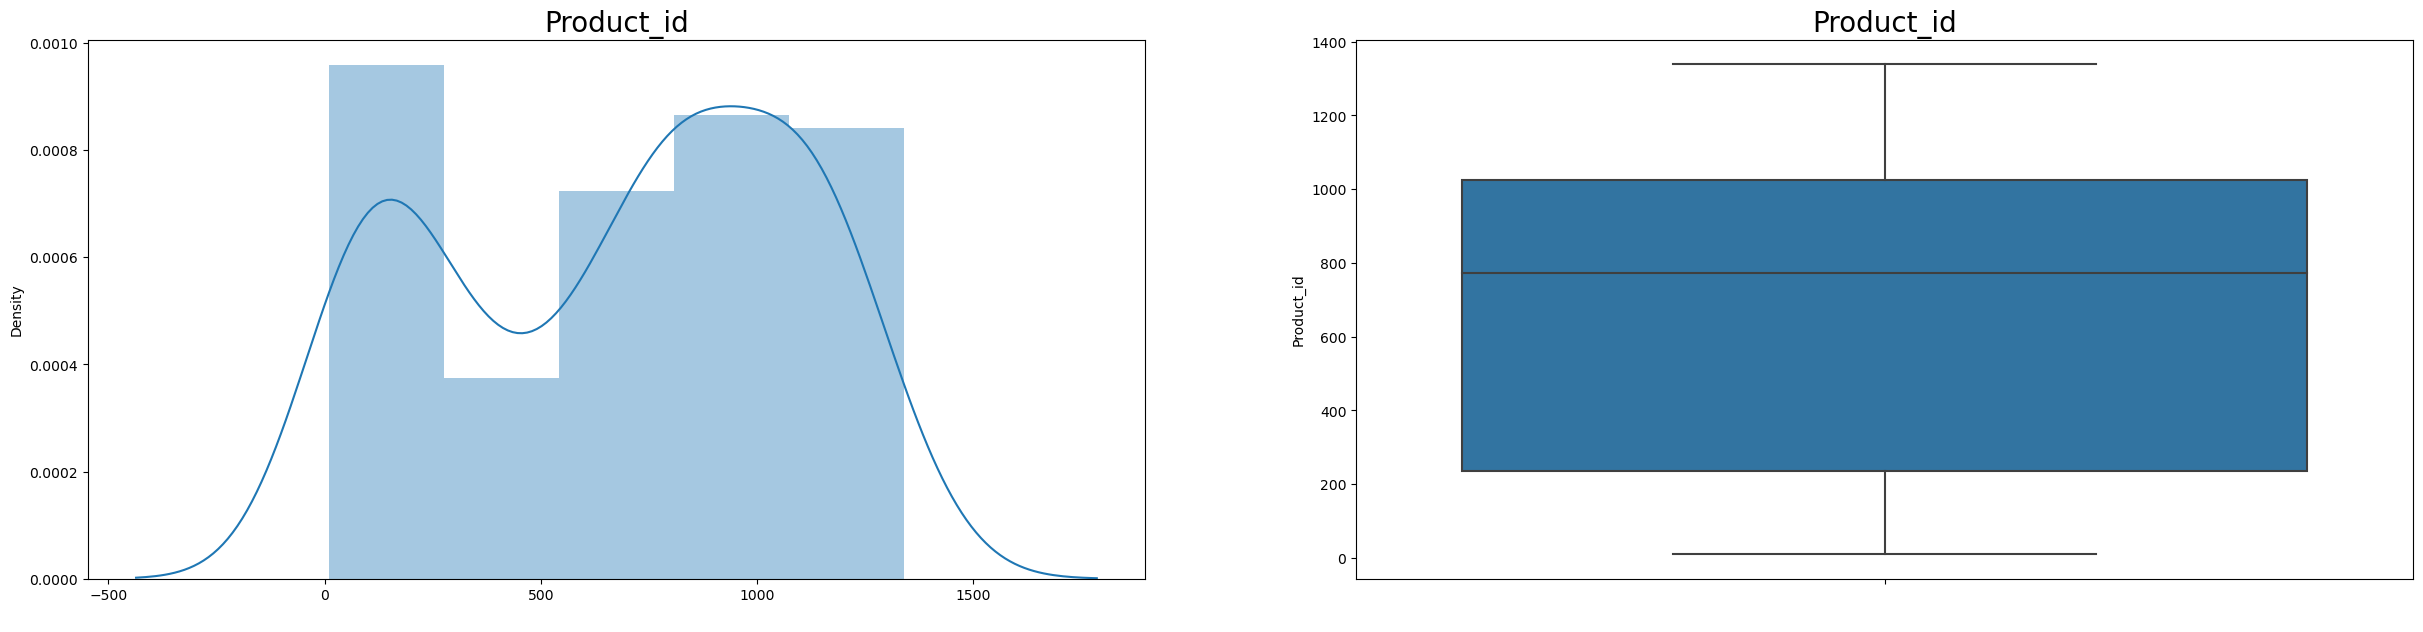

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


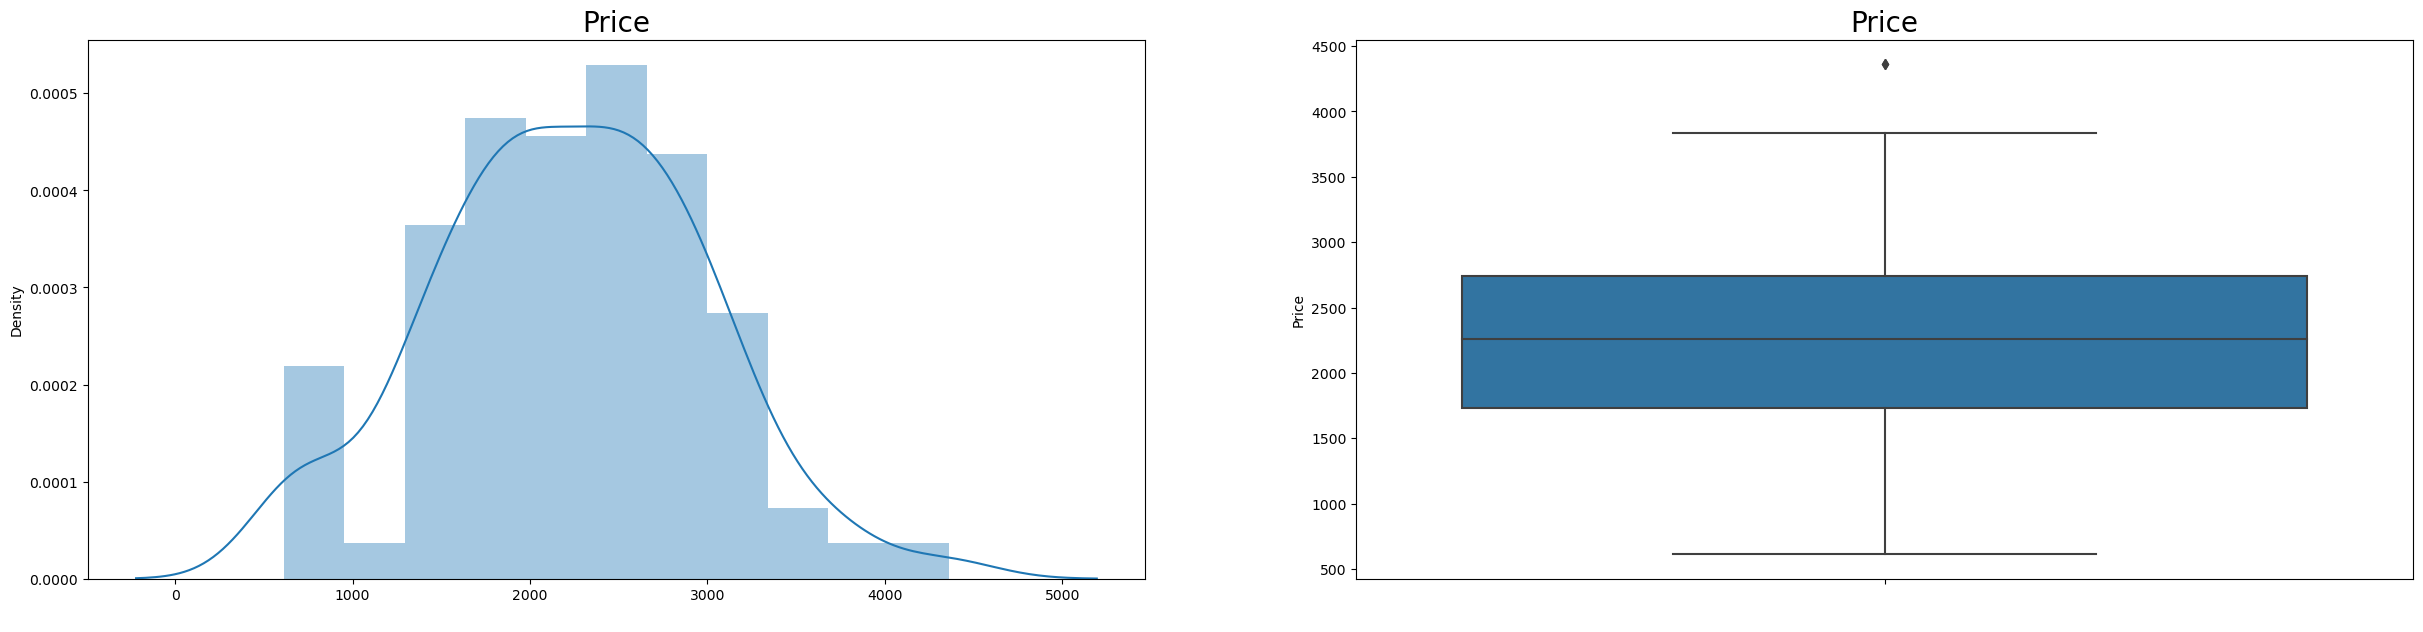

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


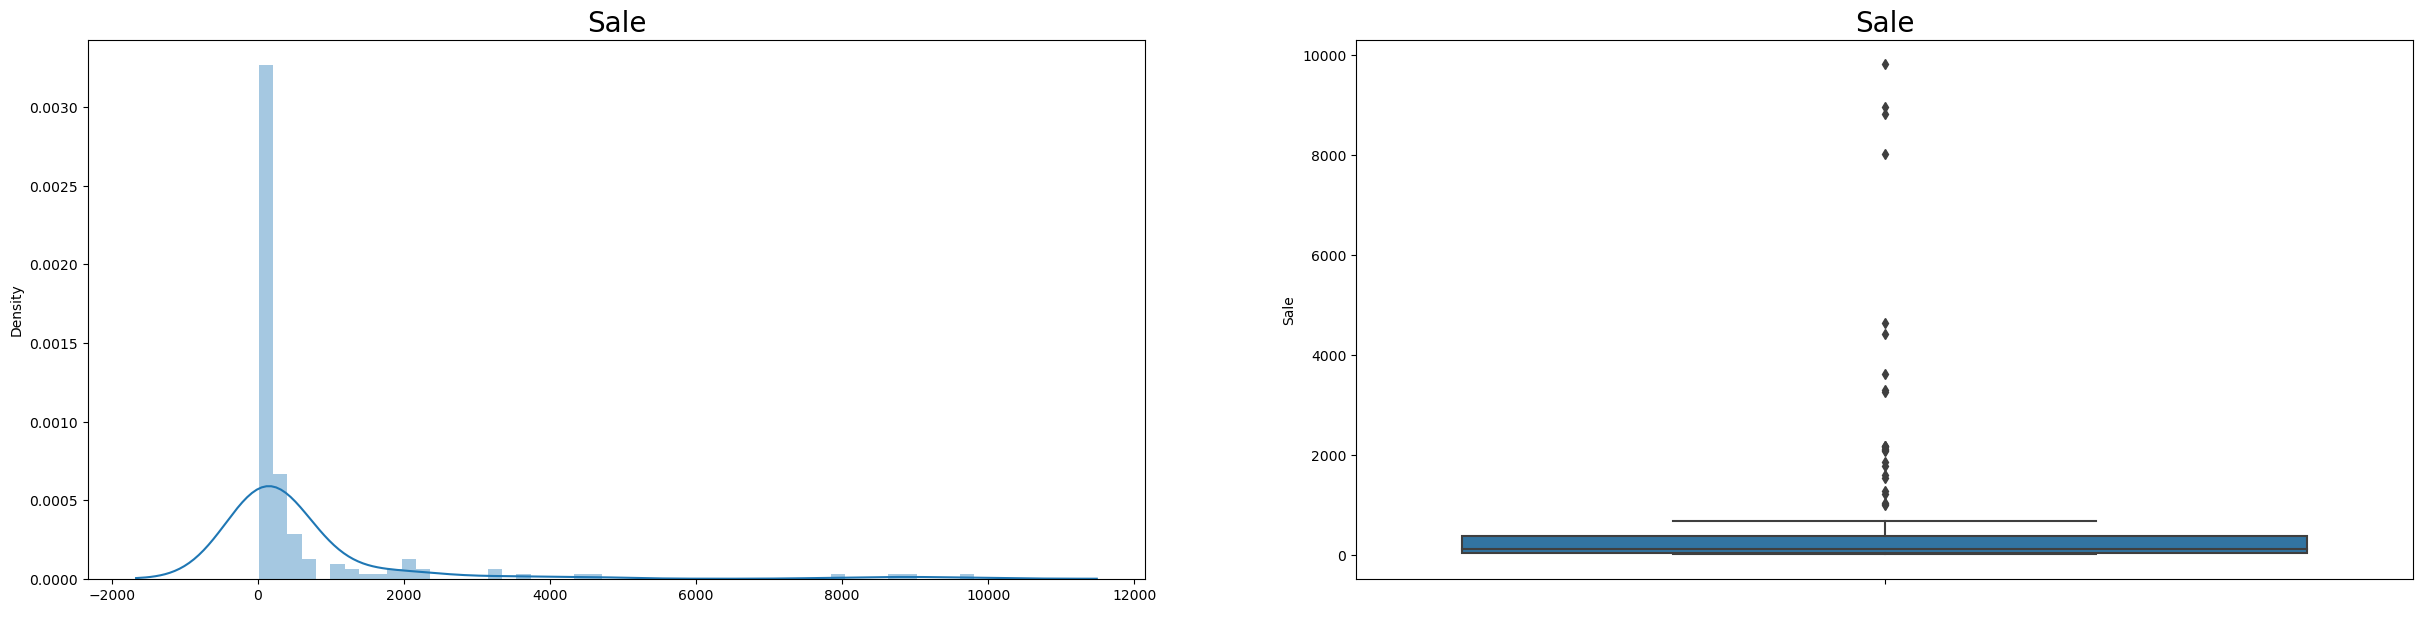

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


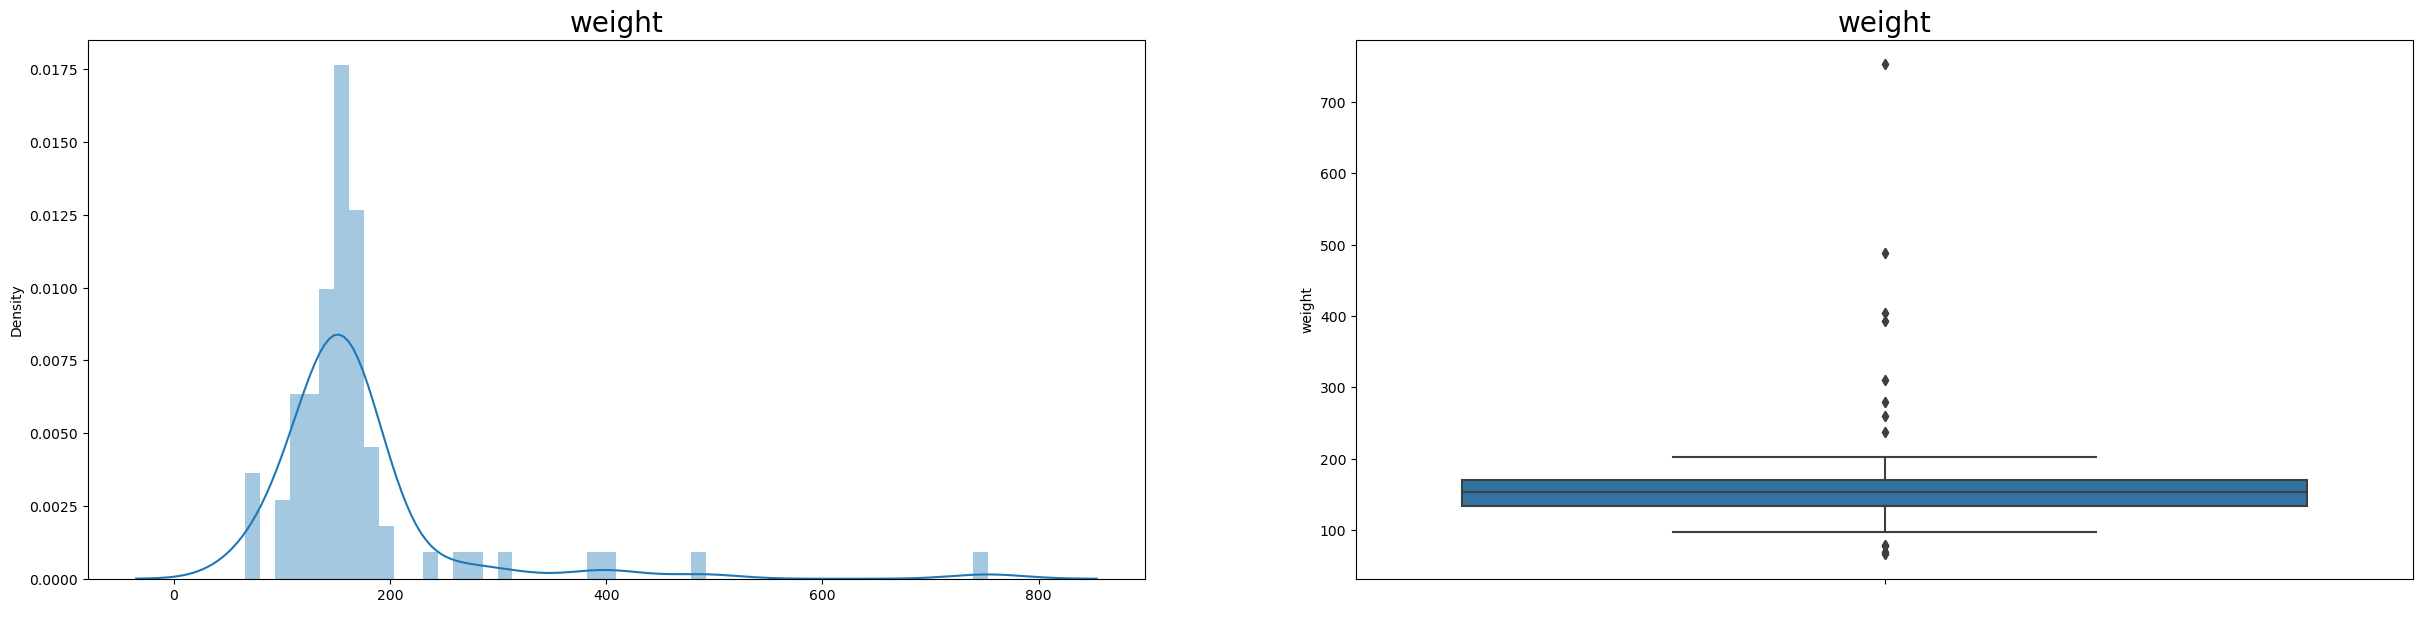

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


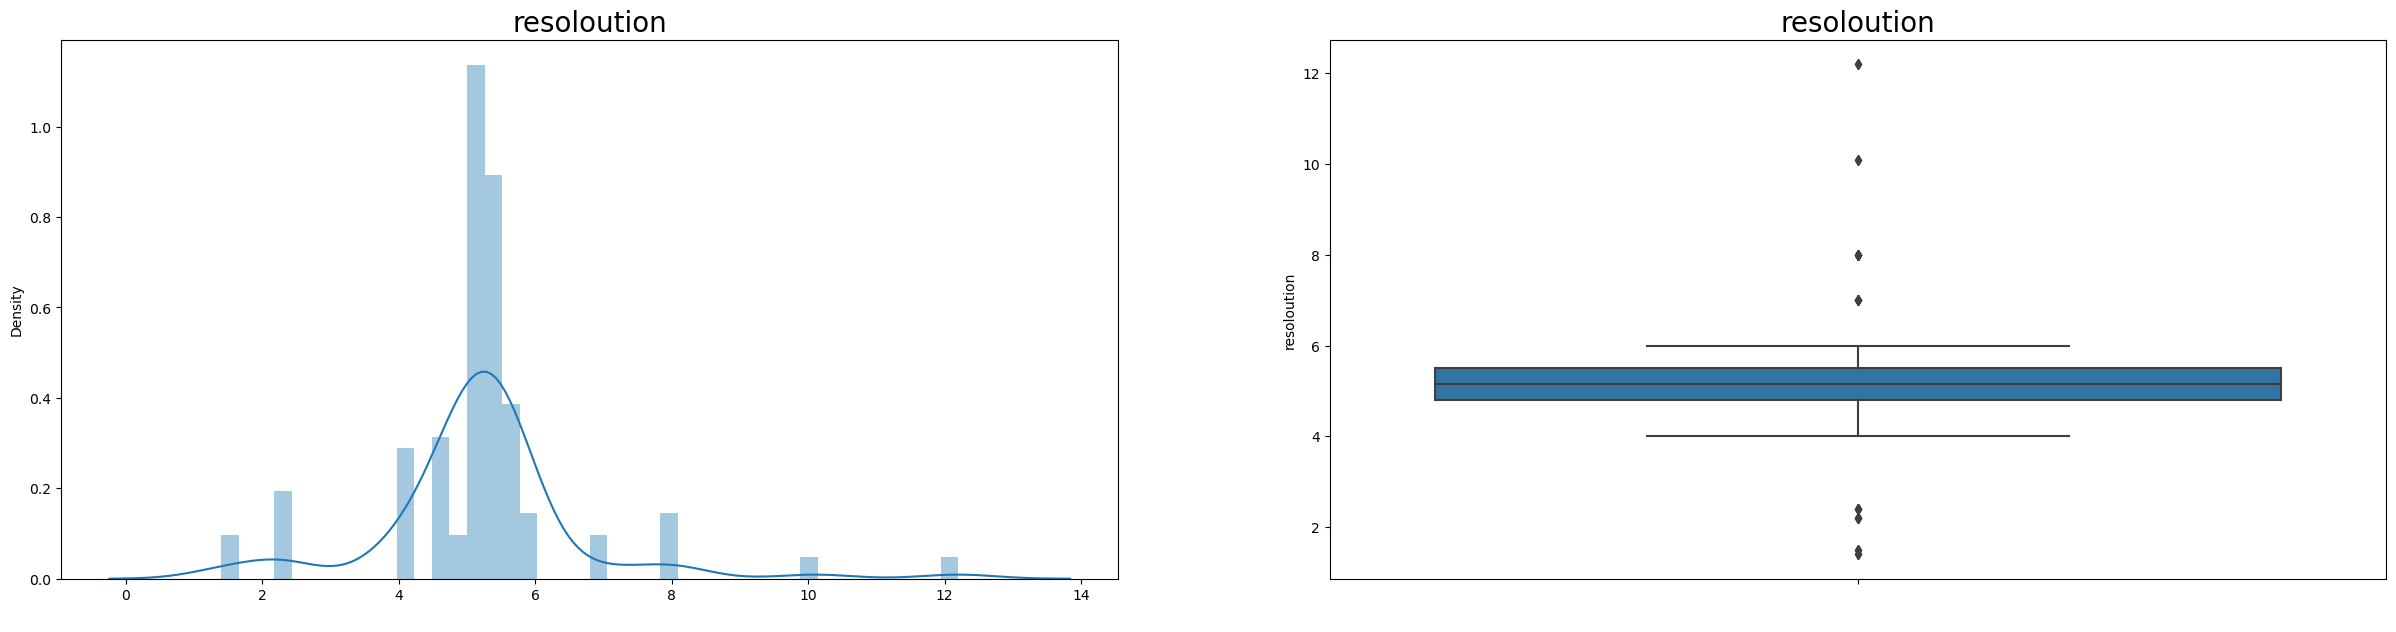

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


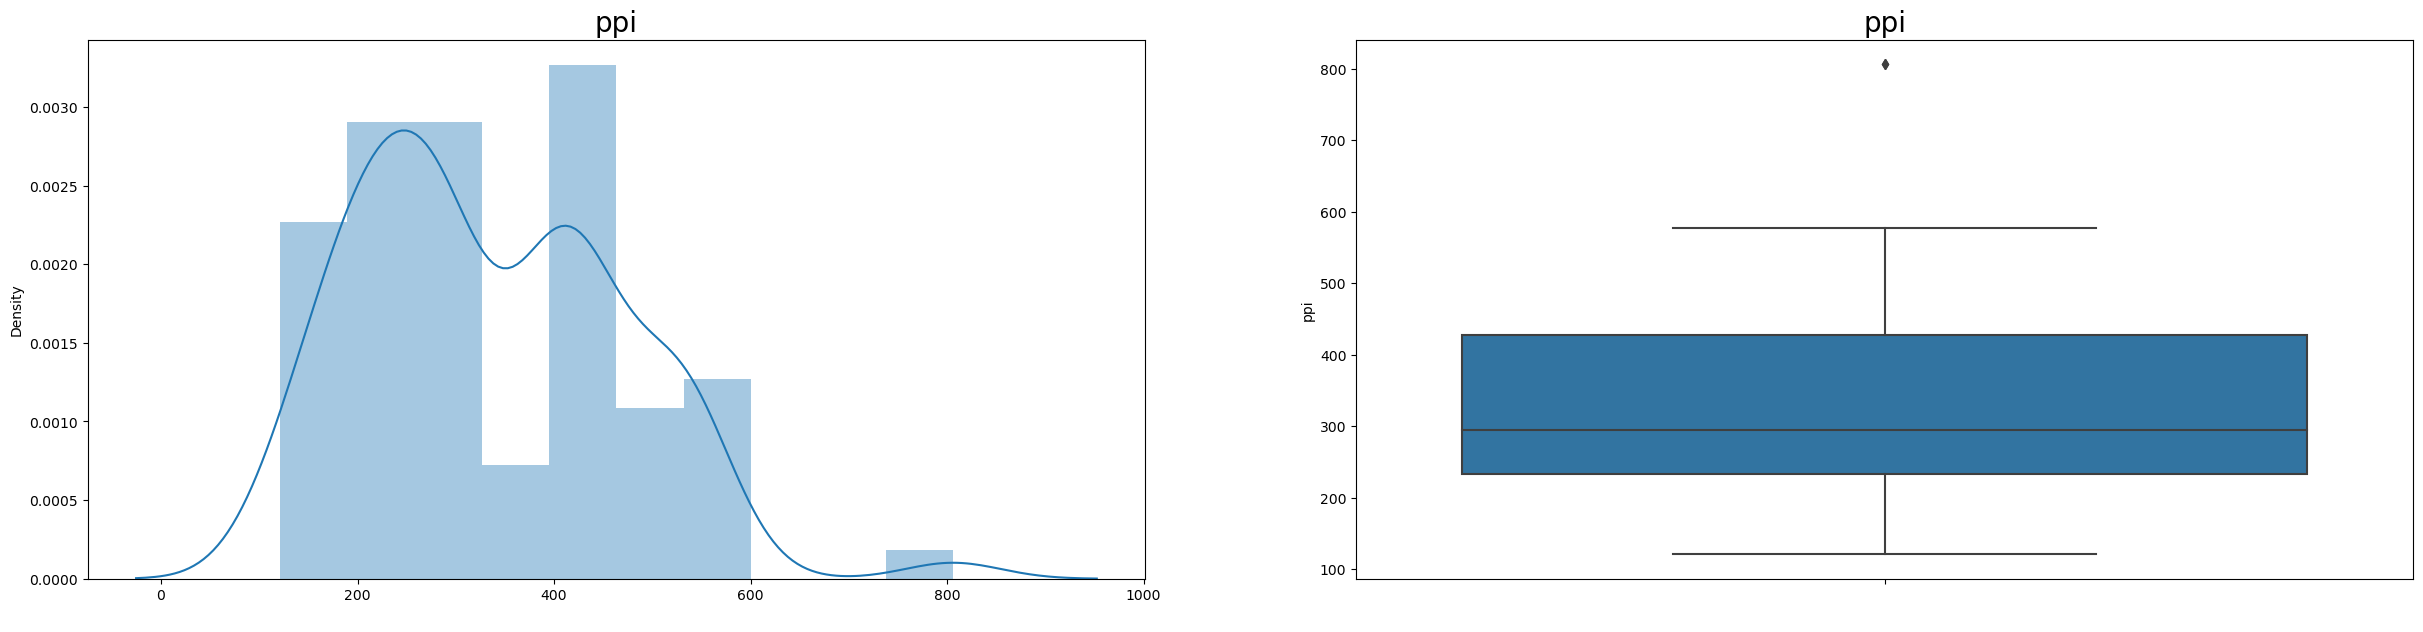

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


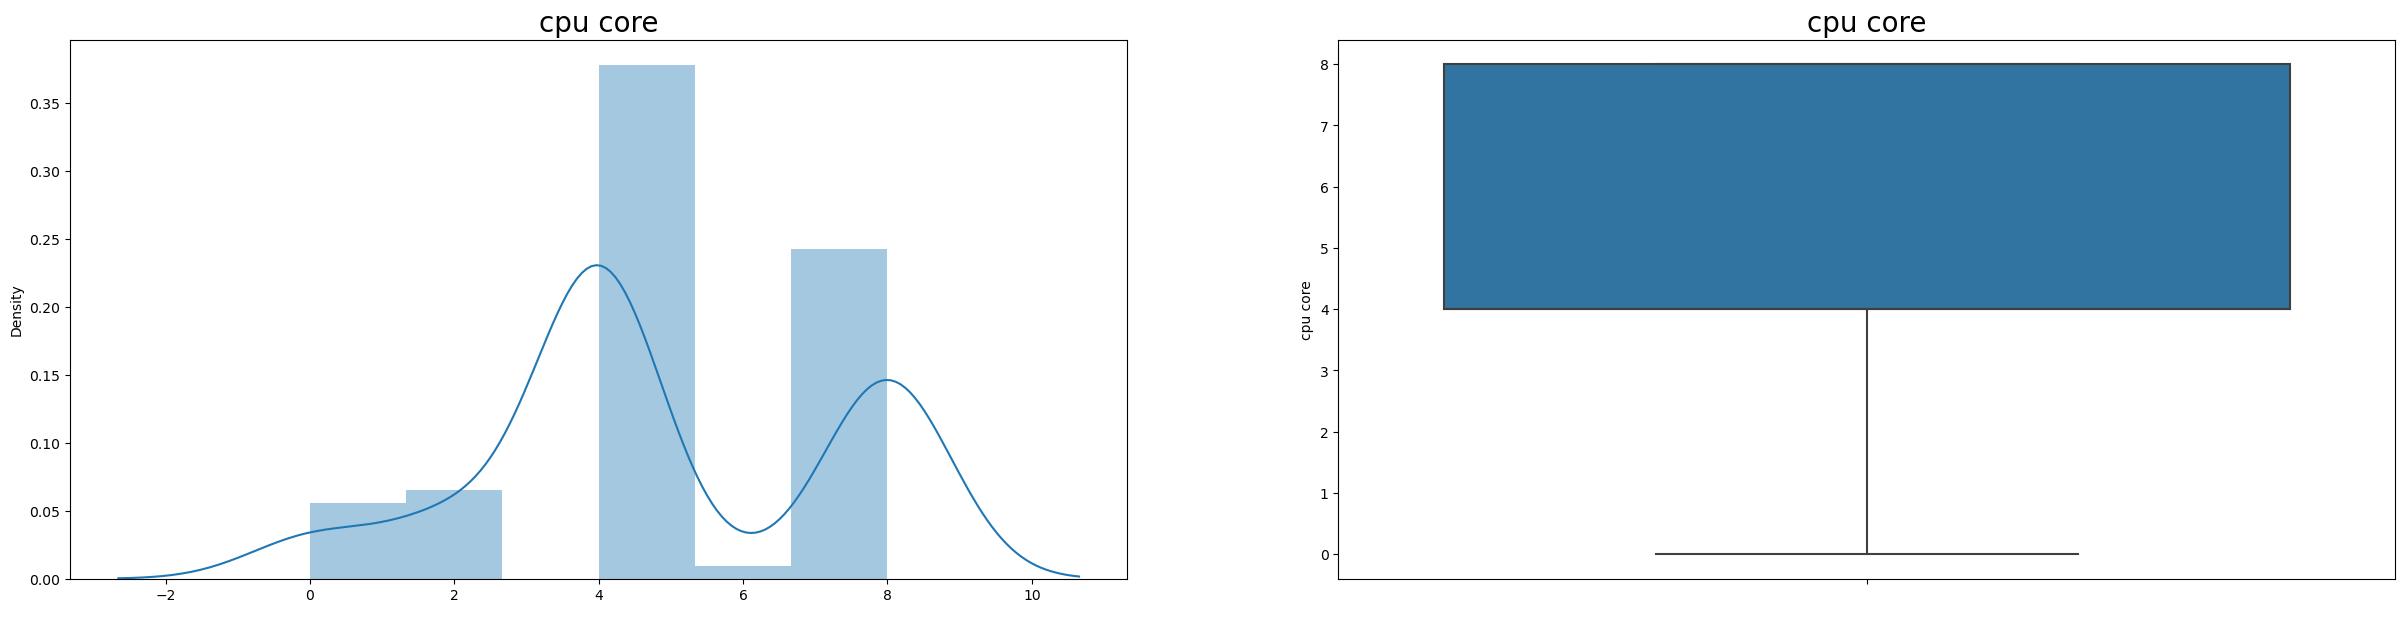

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


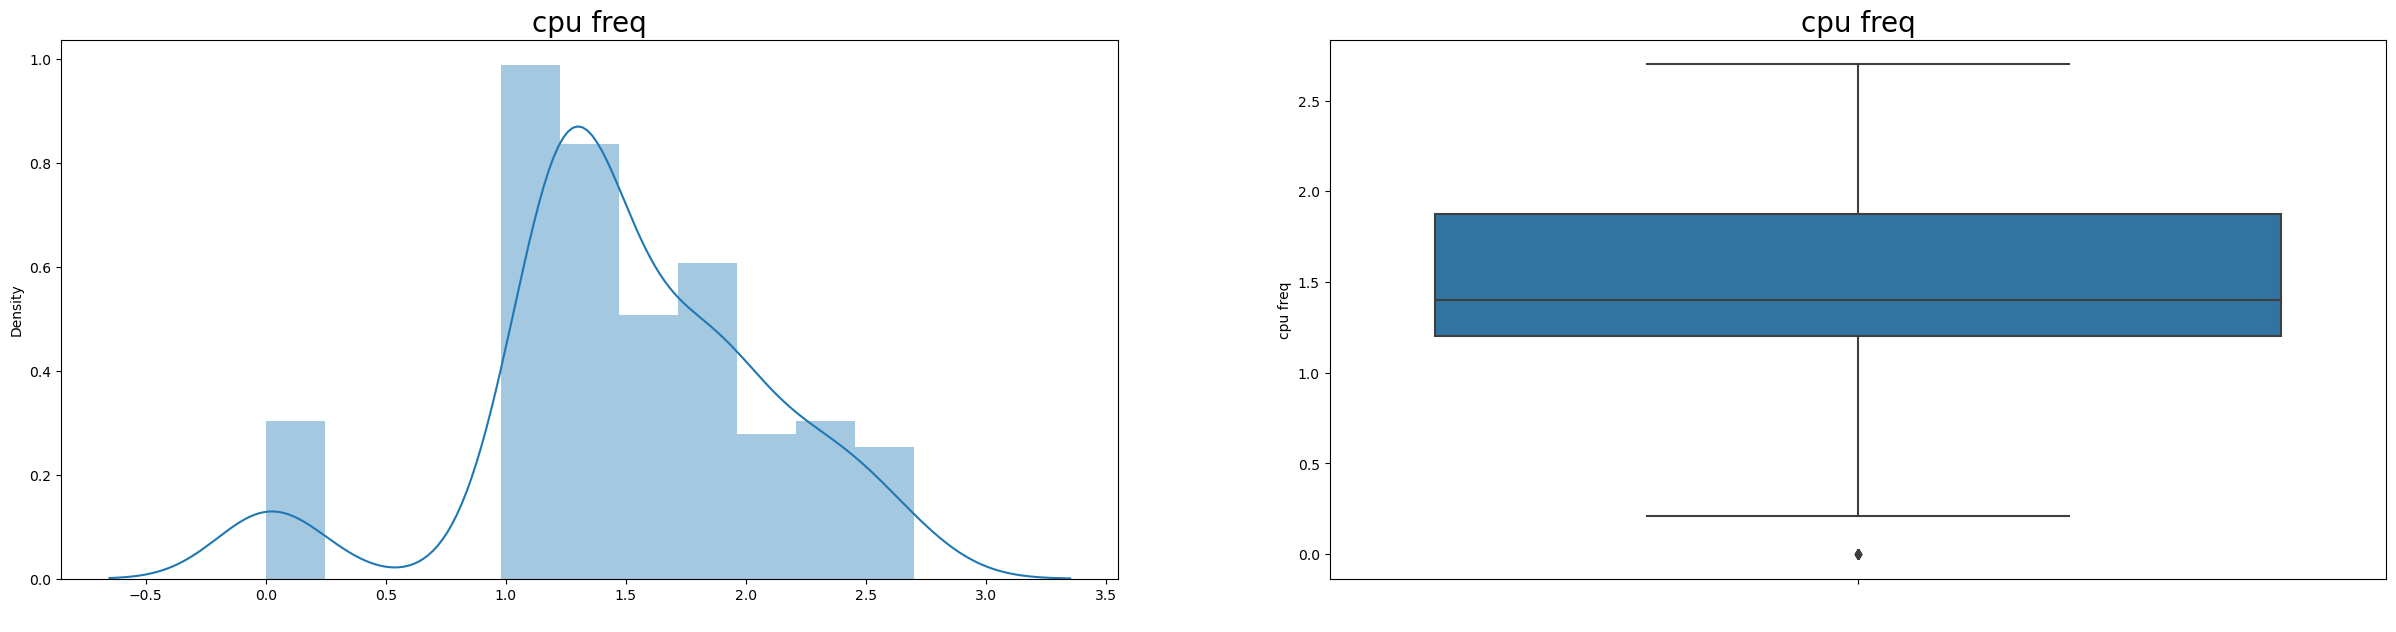

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


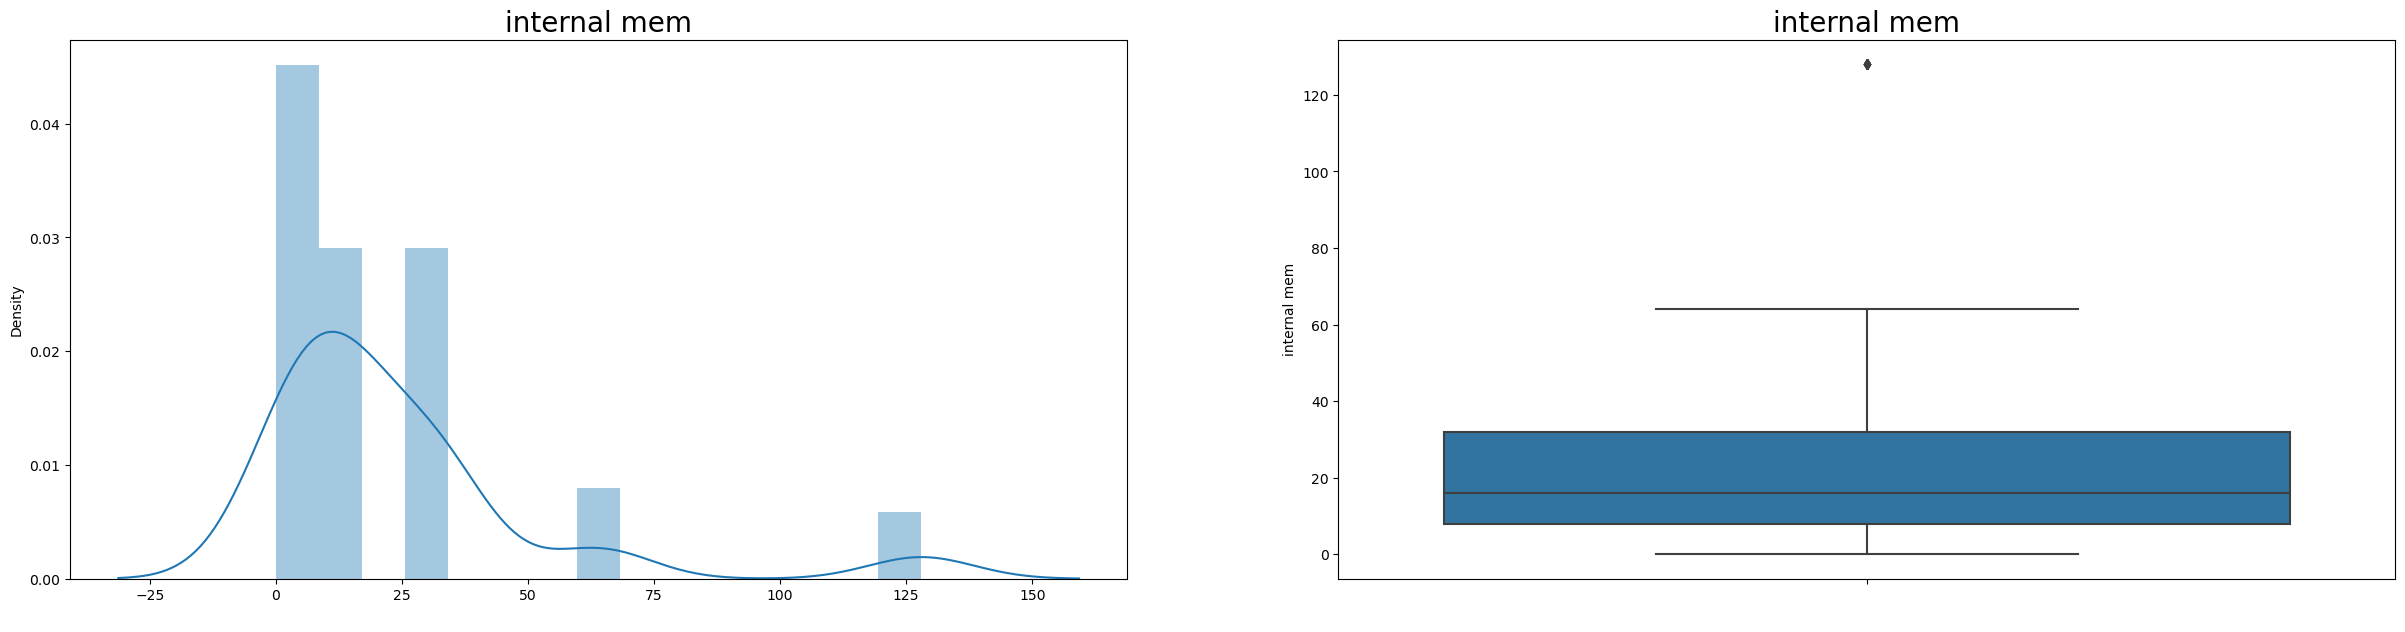

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


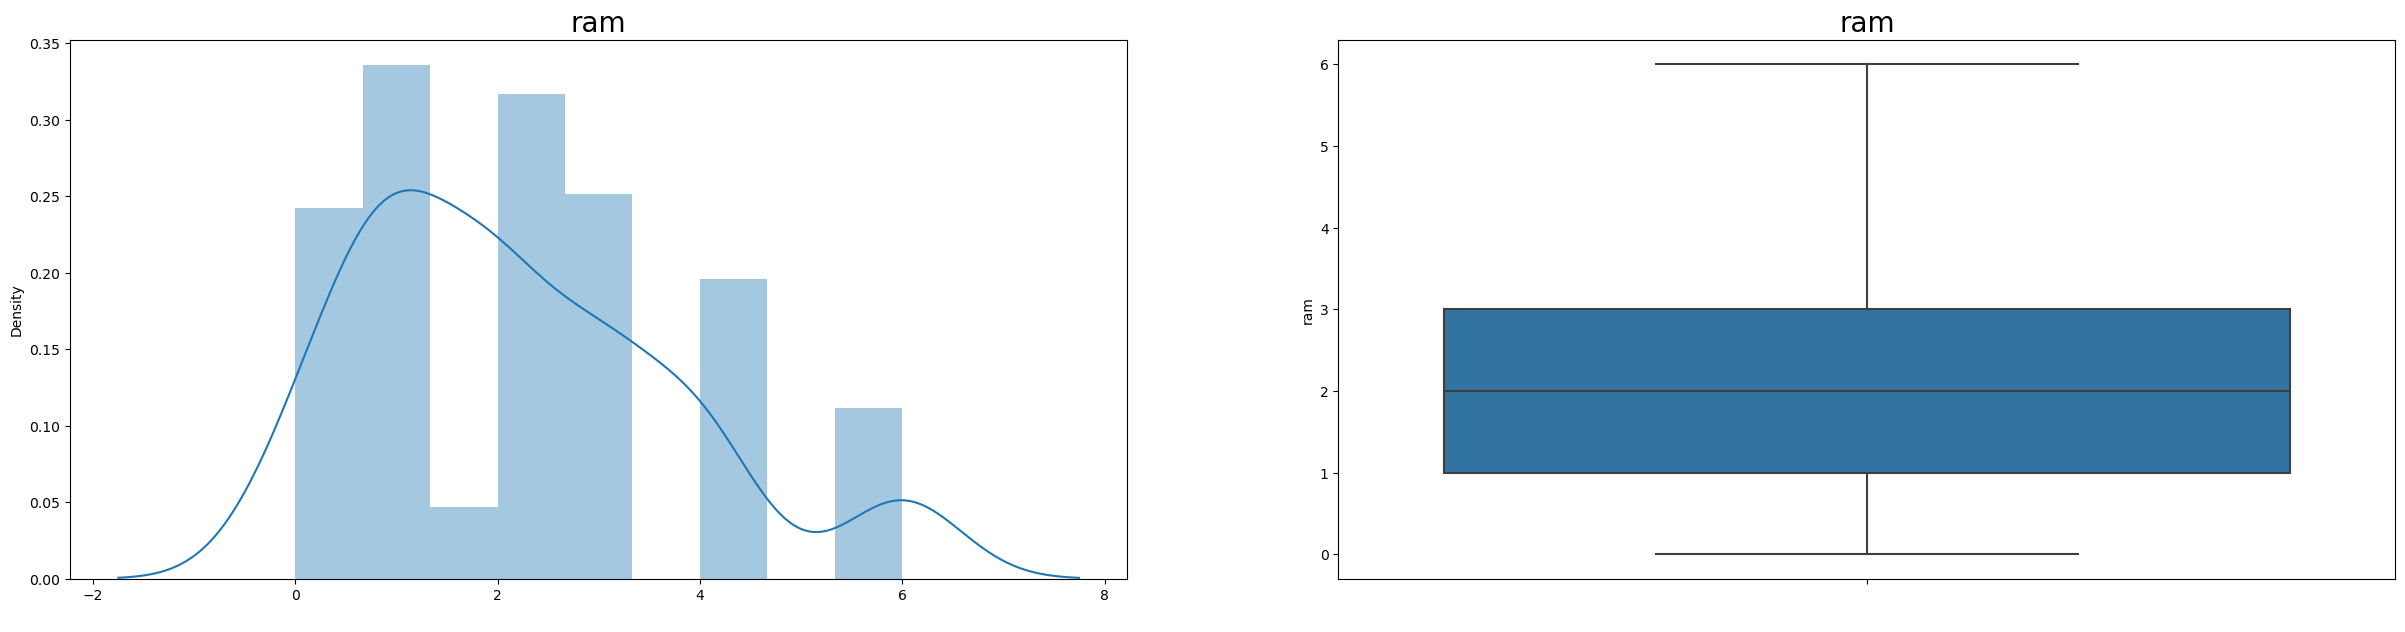

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


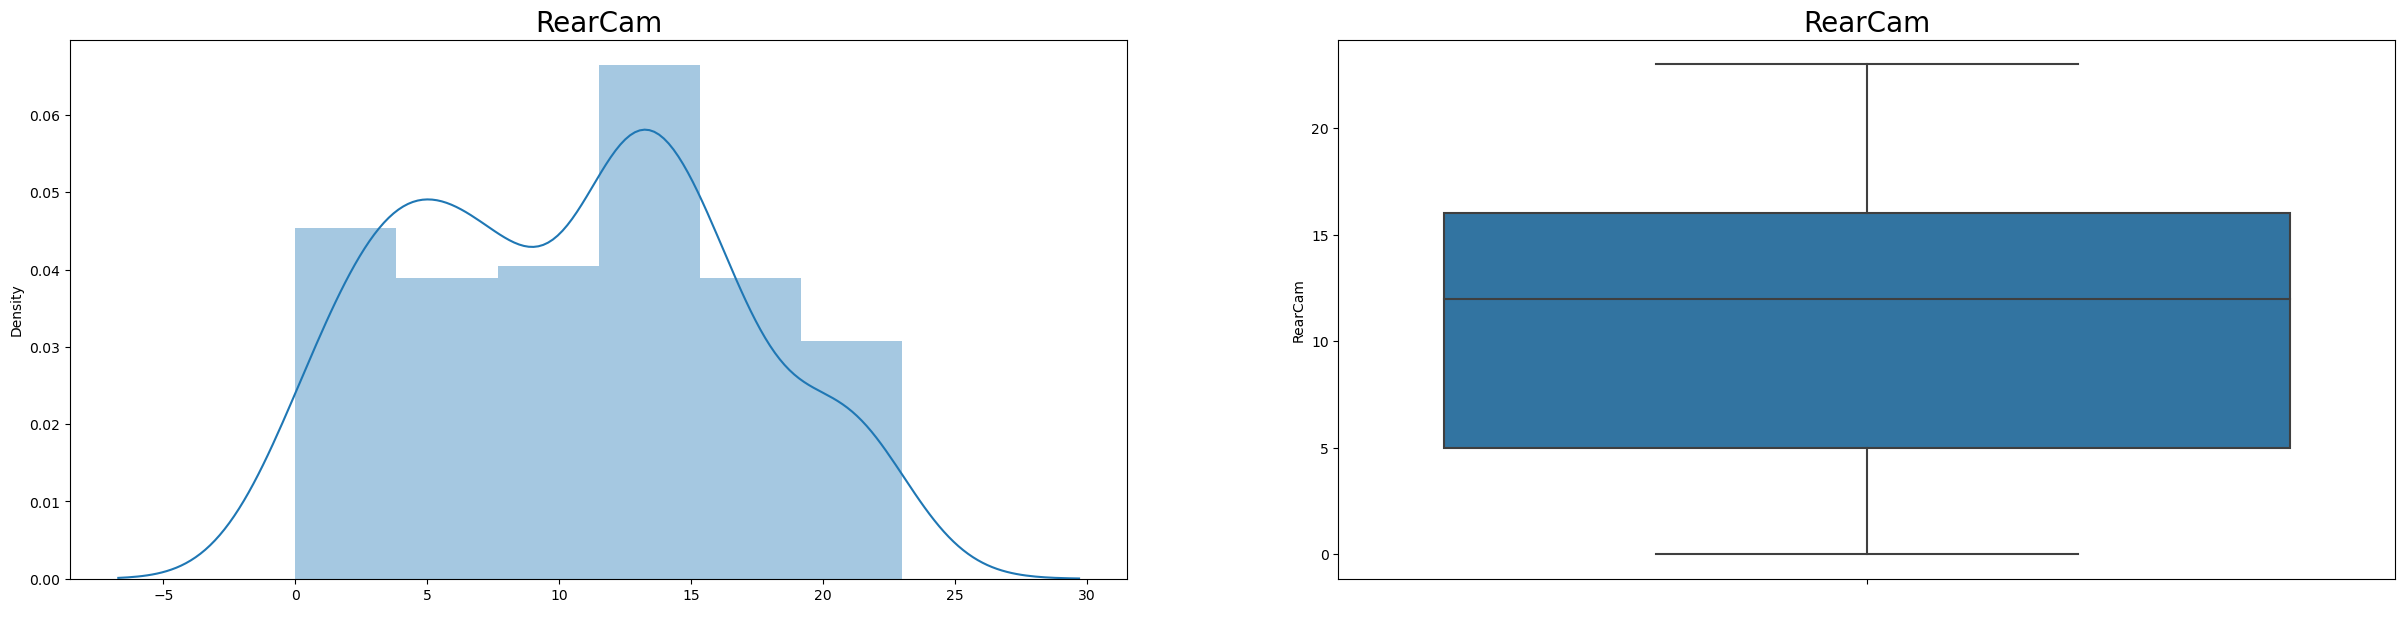

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


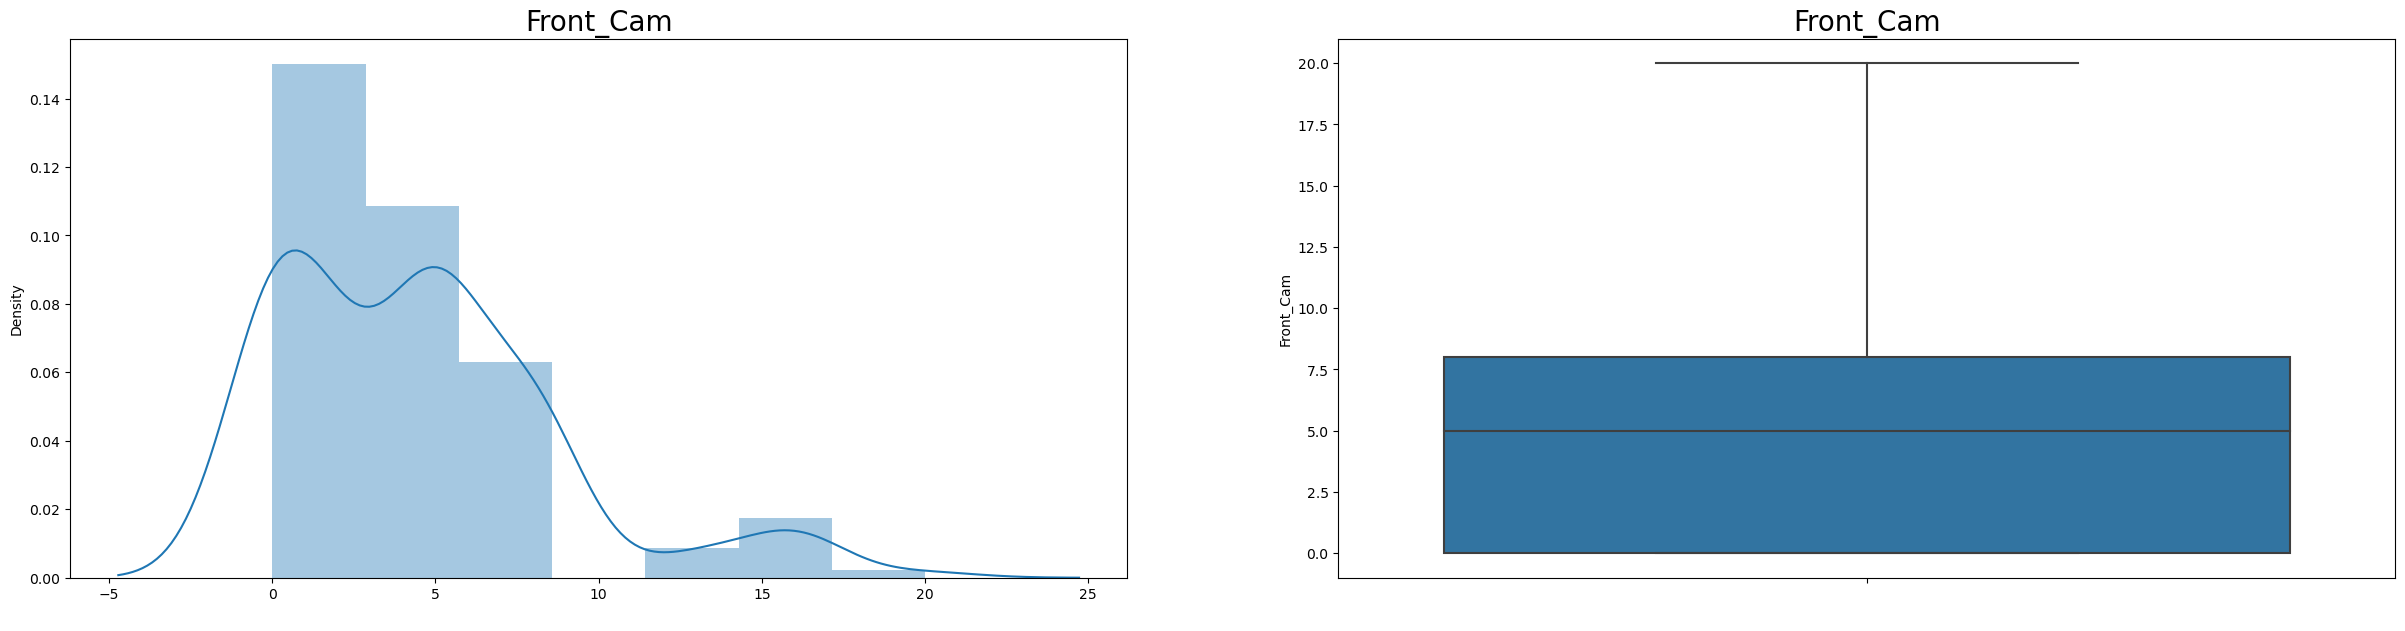

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


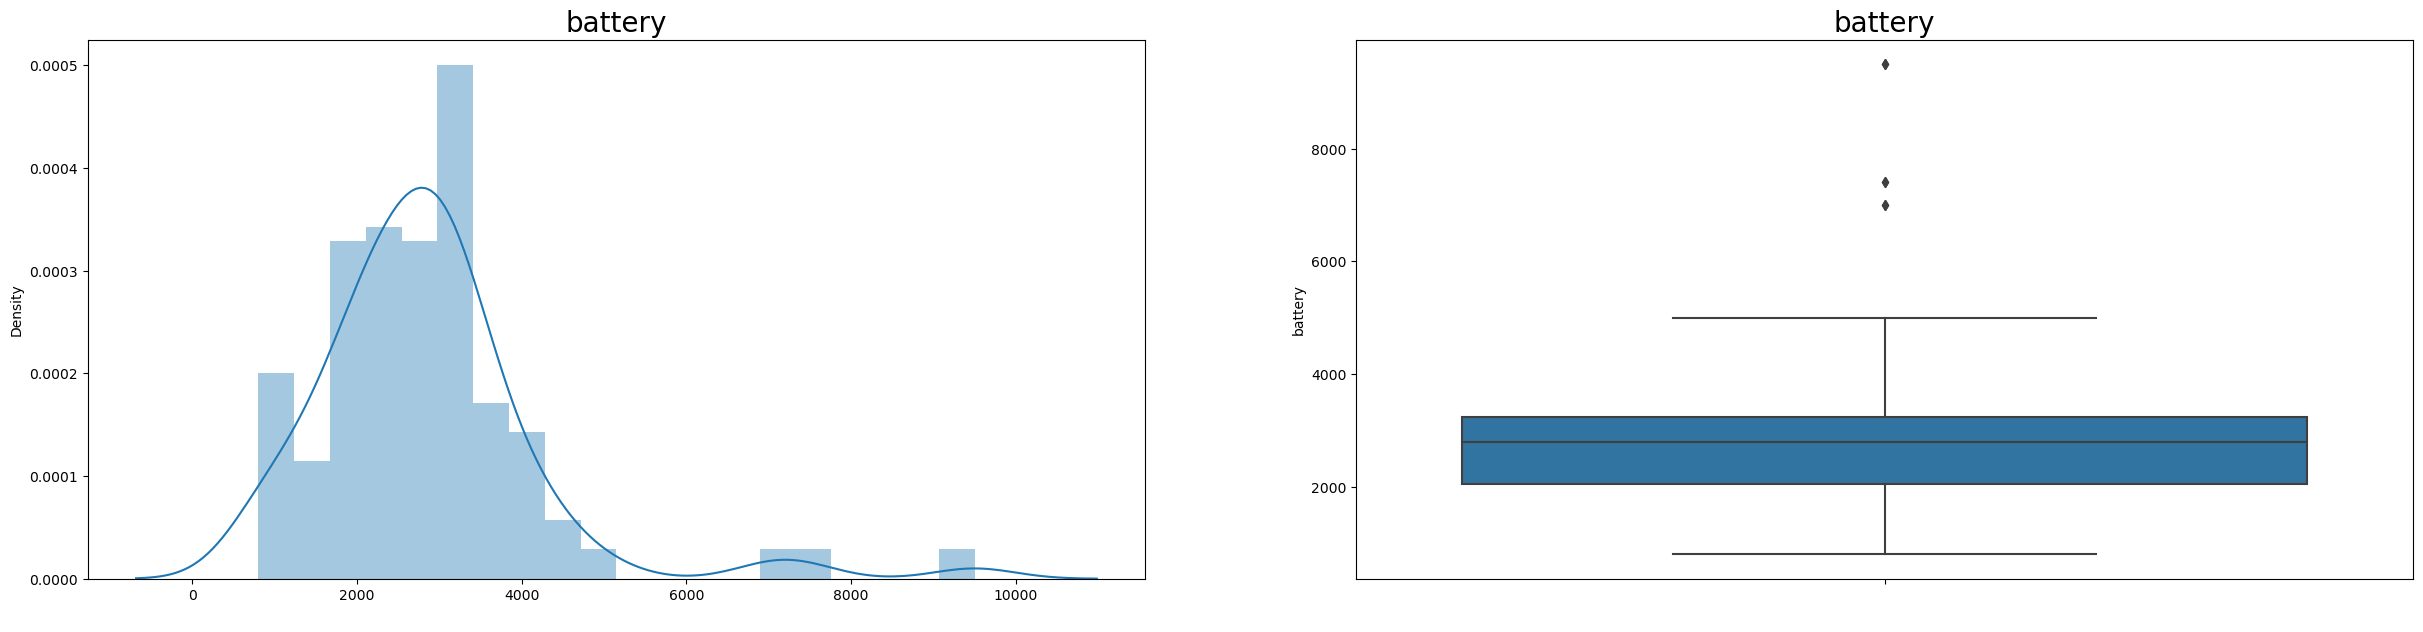

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_79385/3168822129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col])


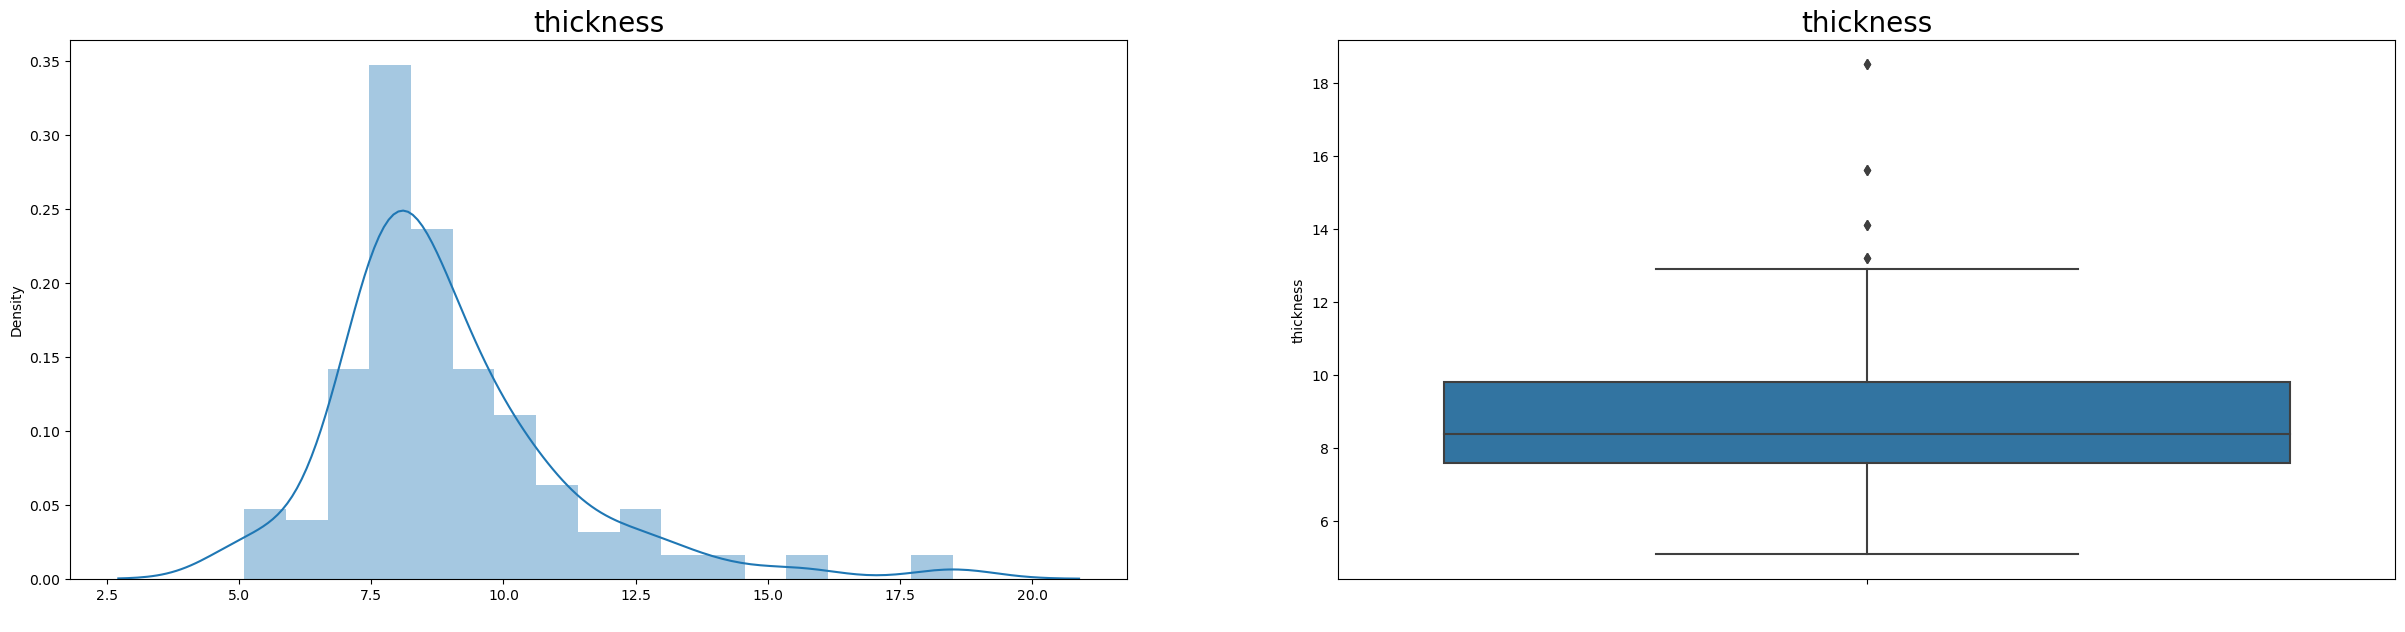

In [7]:
data1_columns = data1.columns
data1_columns
# Gives us the distribution and boxplot for all the columns.
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(data1[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = data1[col])
    plt.title(col, size = 20)
    plt.show()

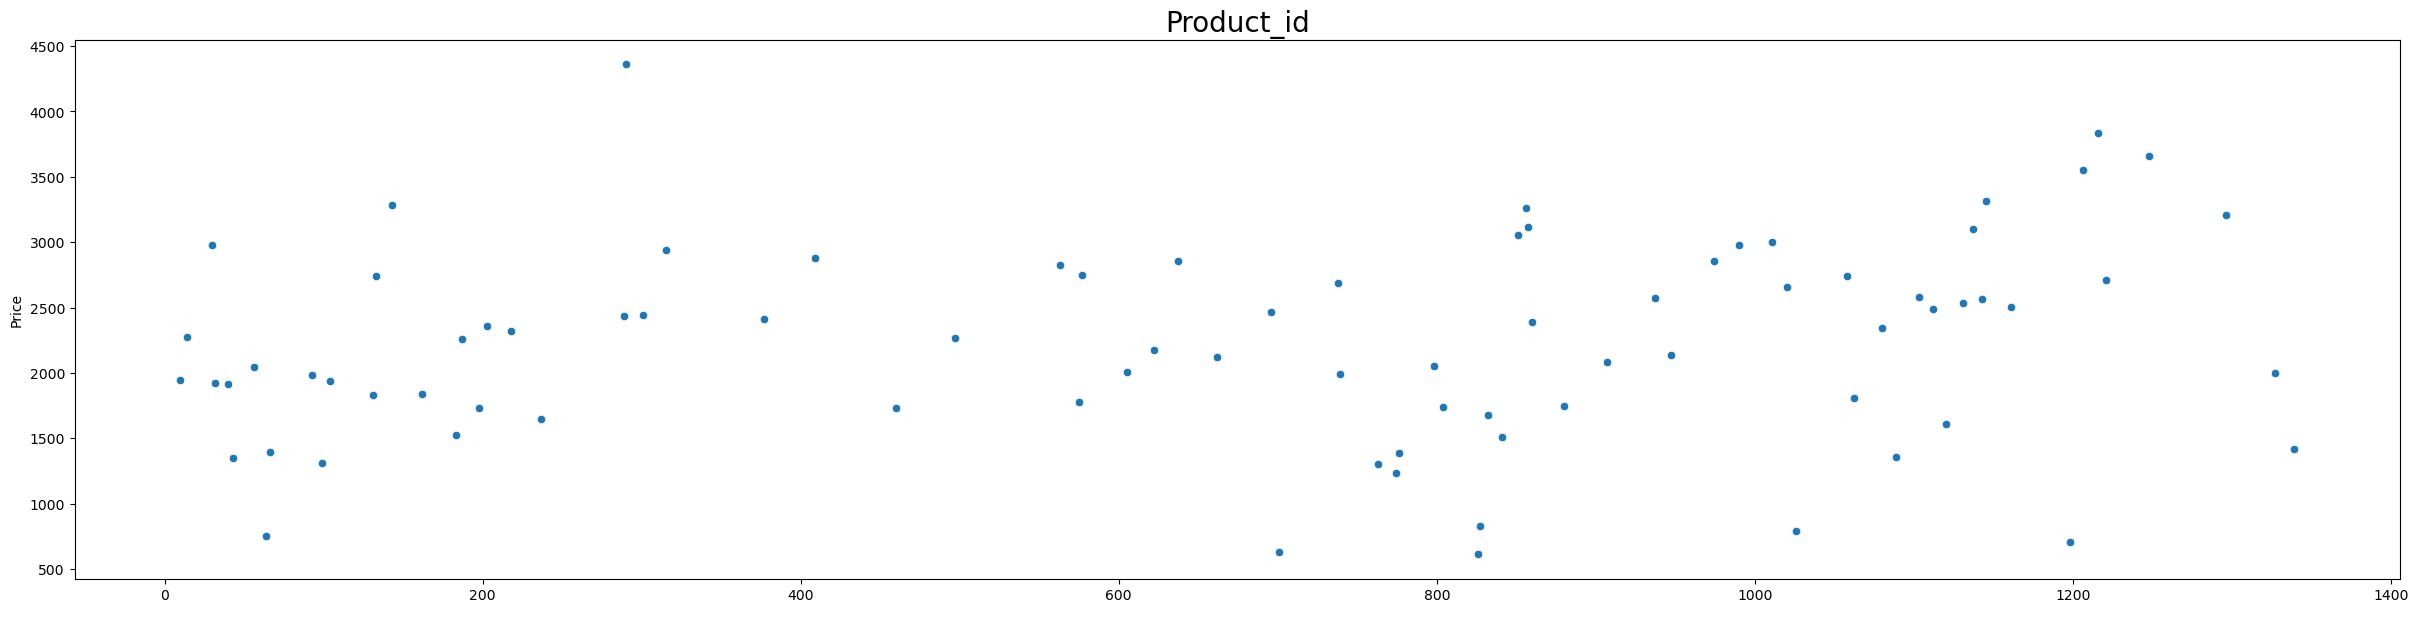

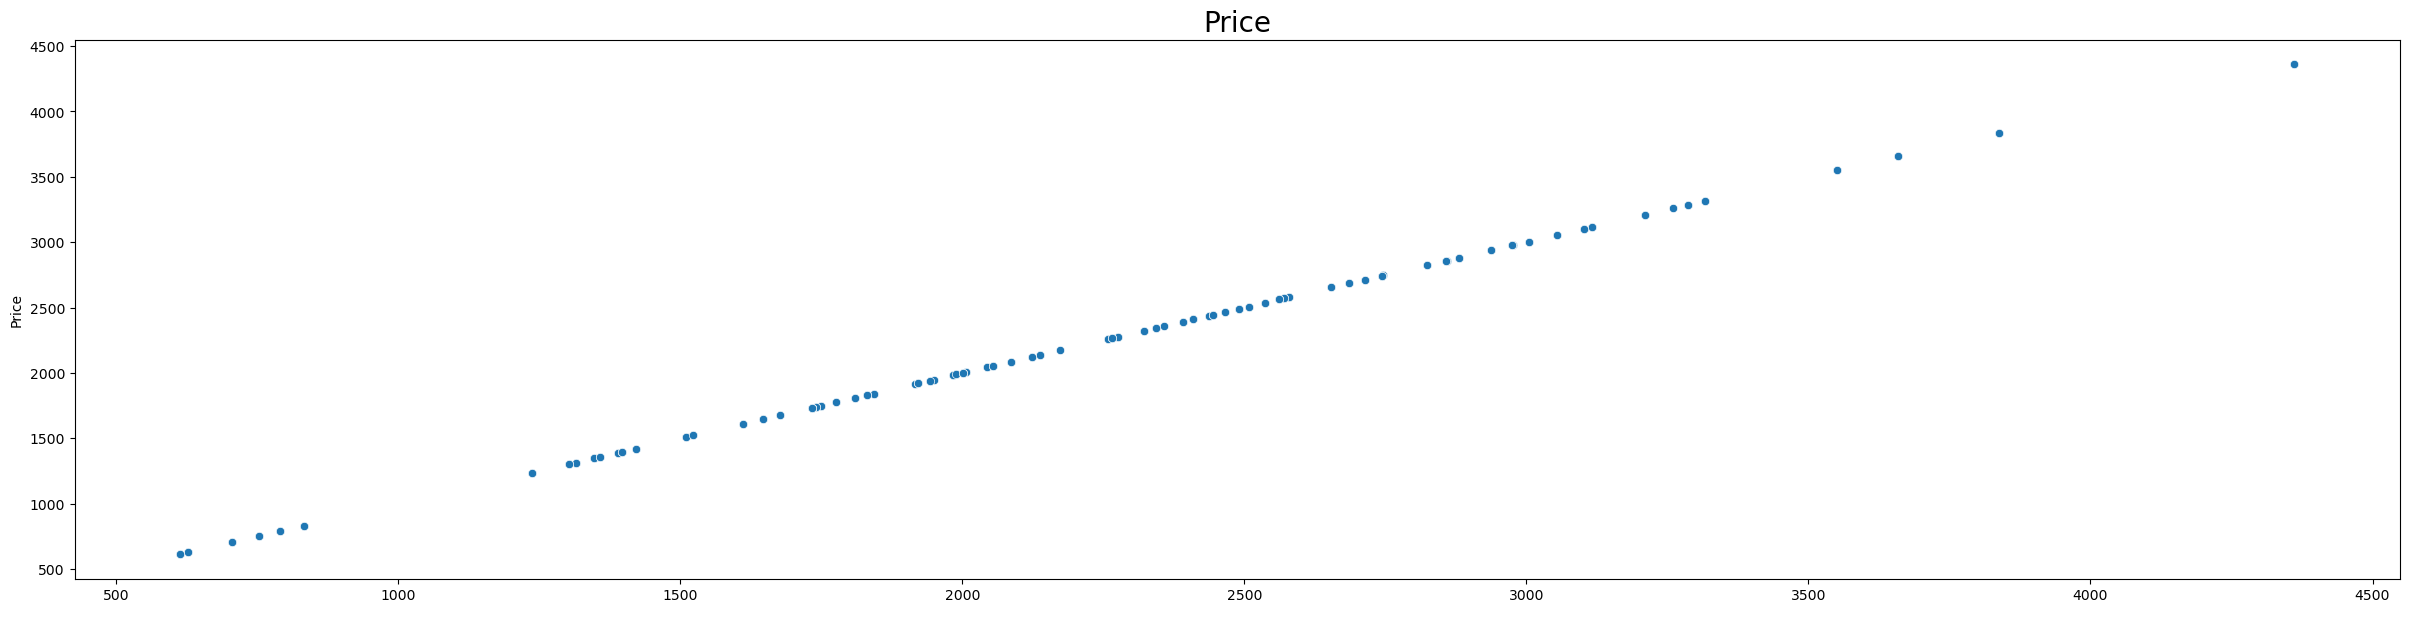

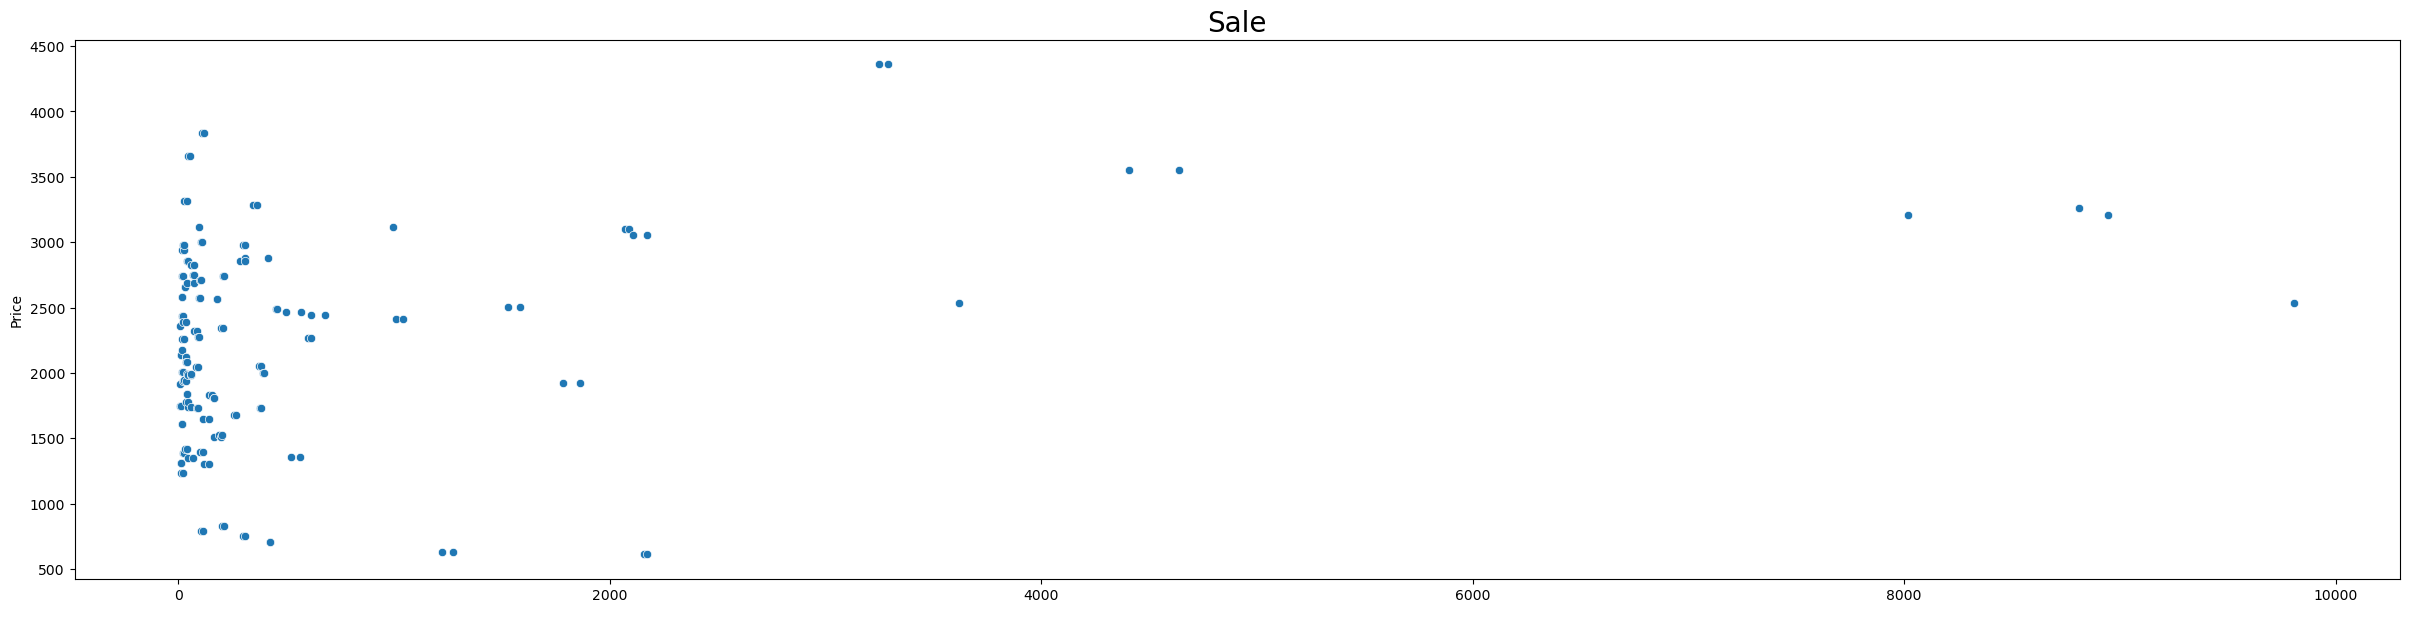

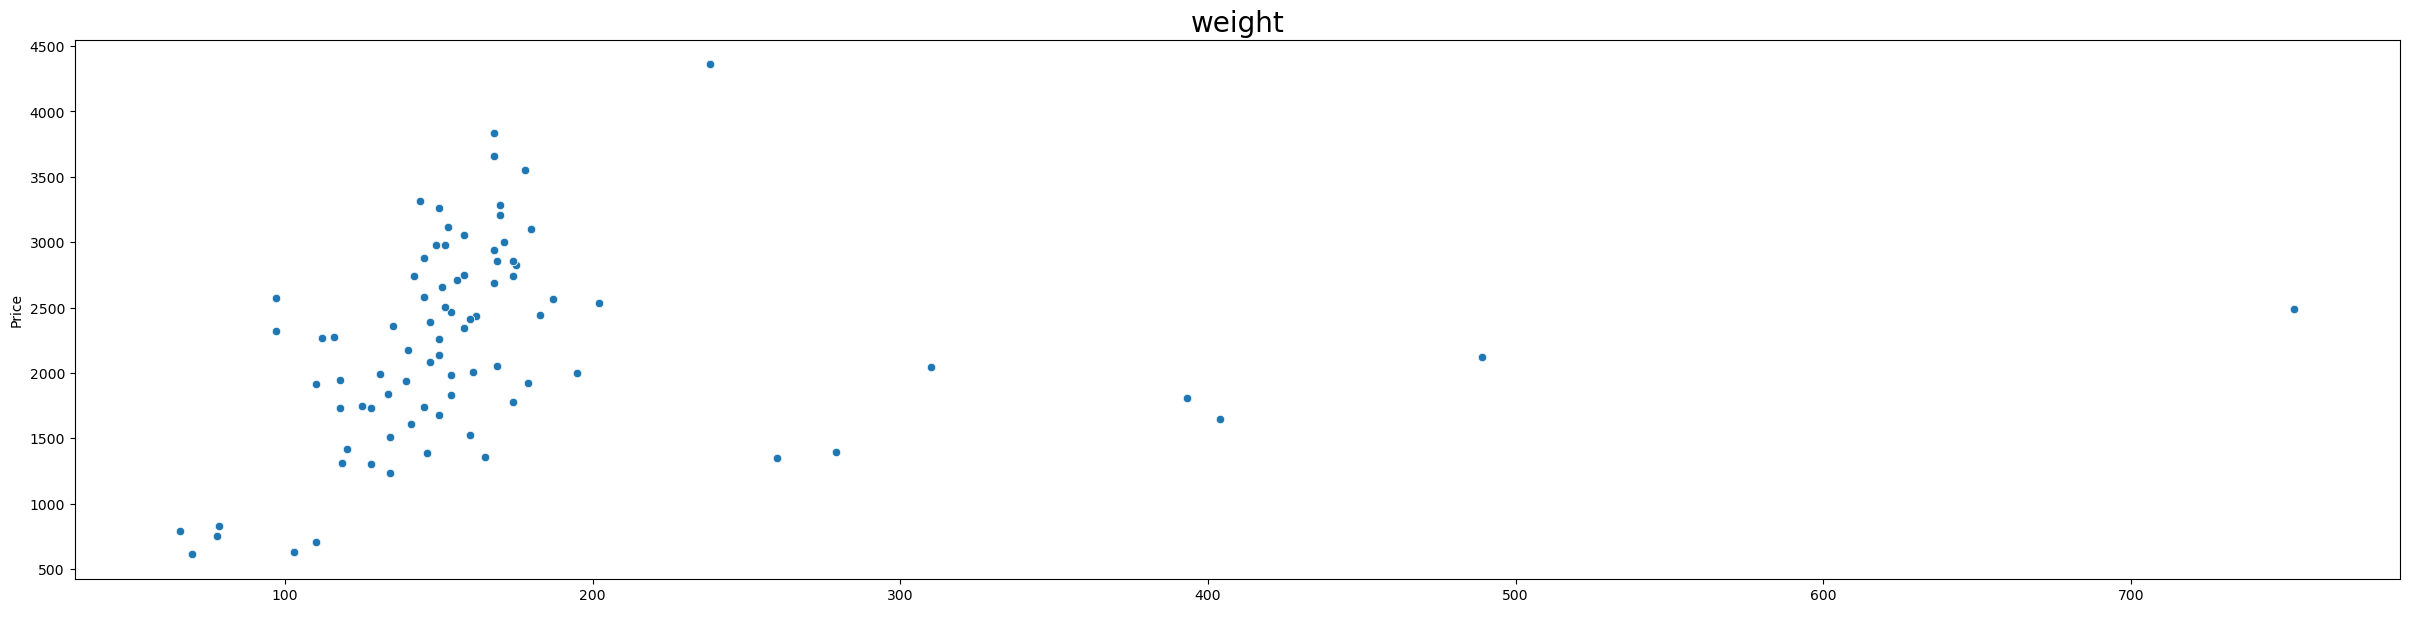

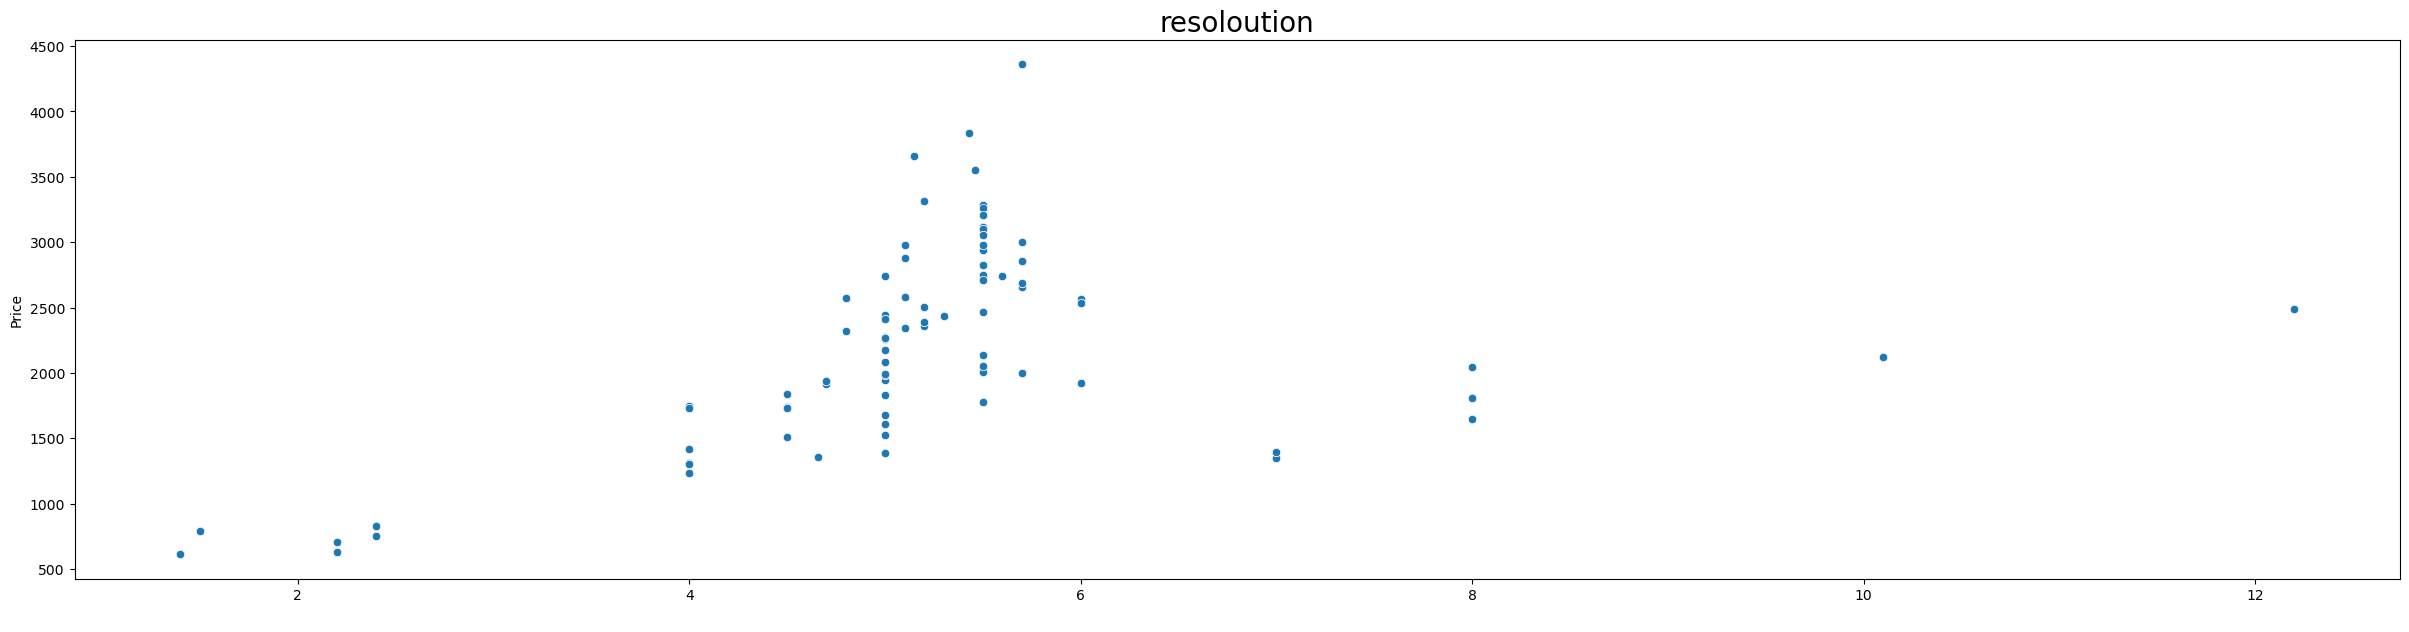

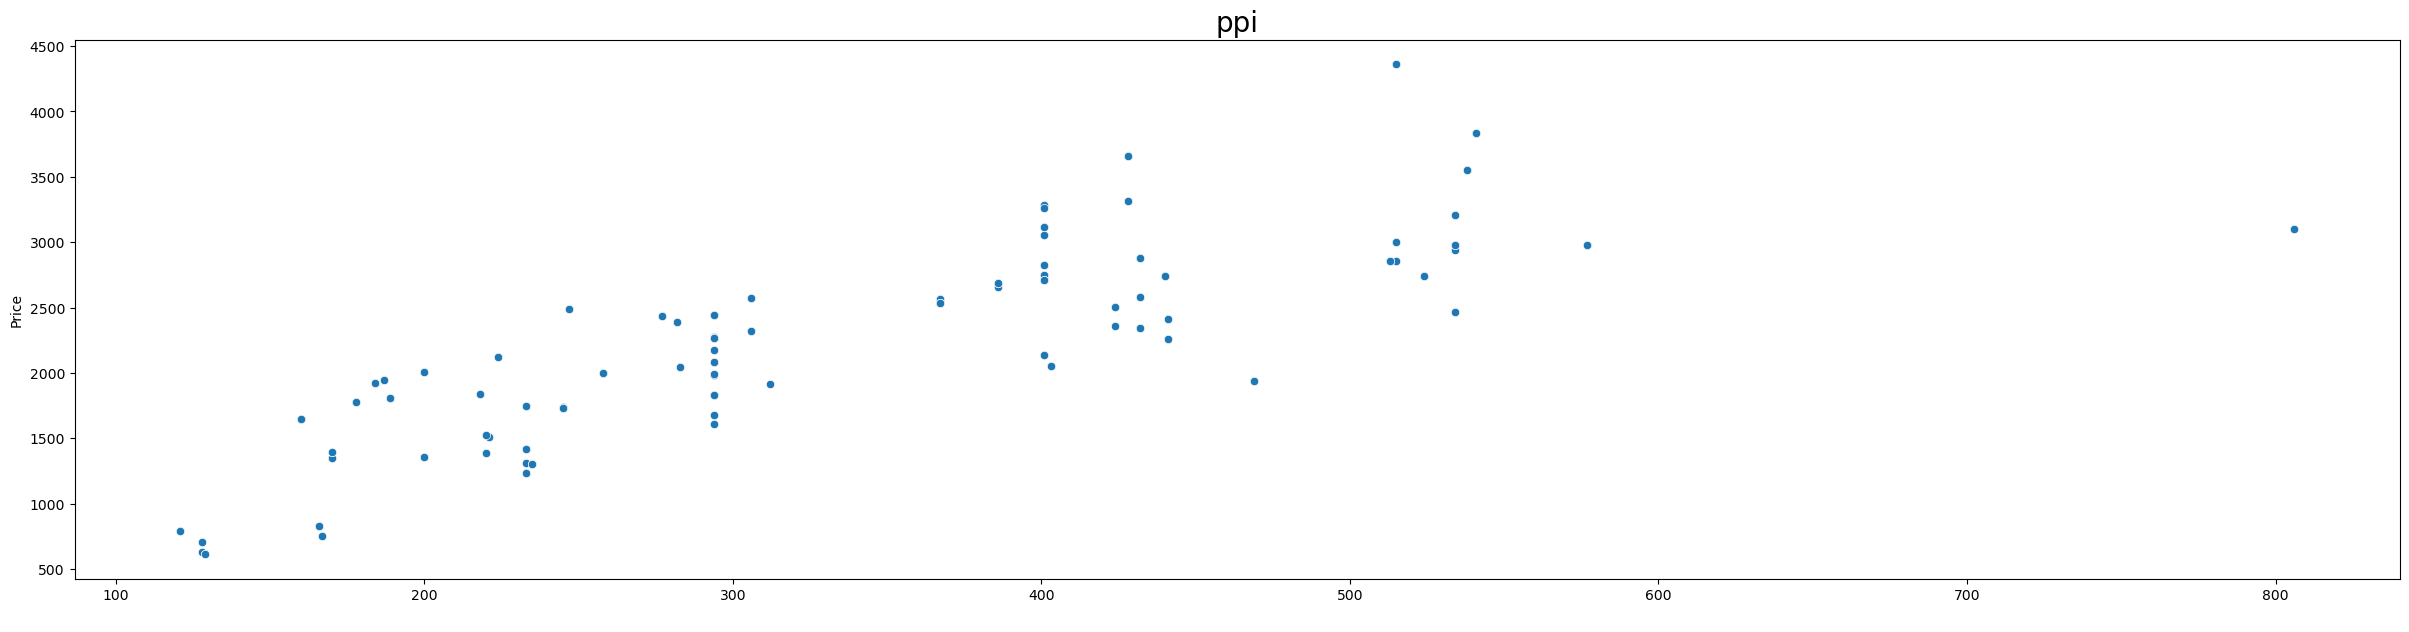

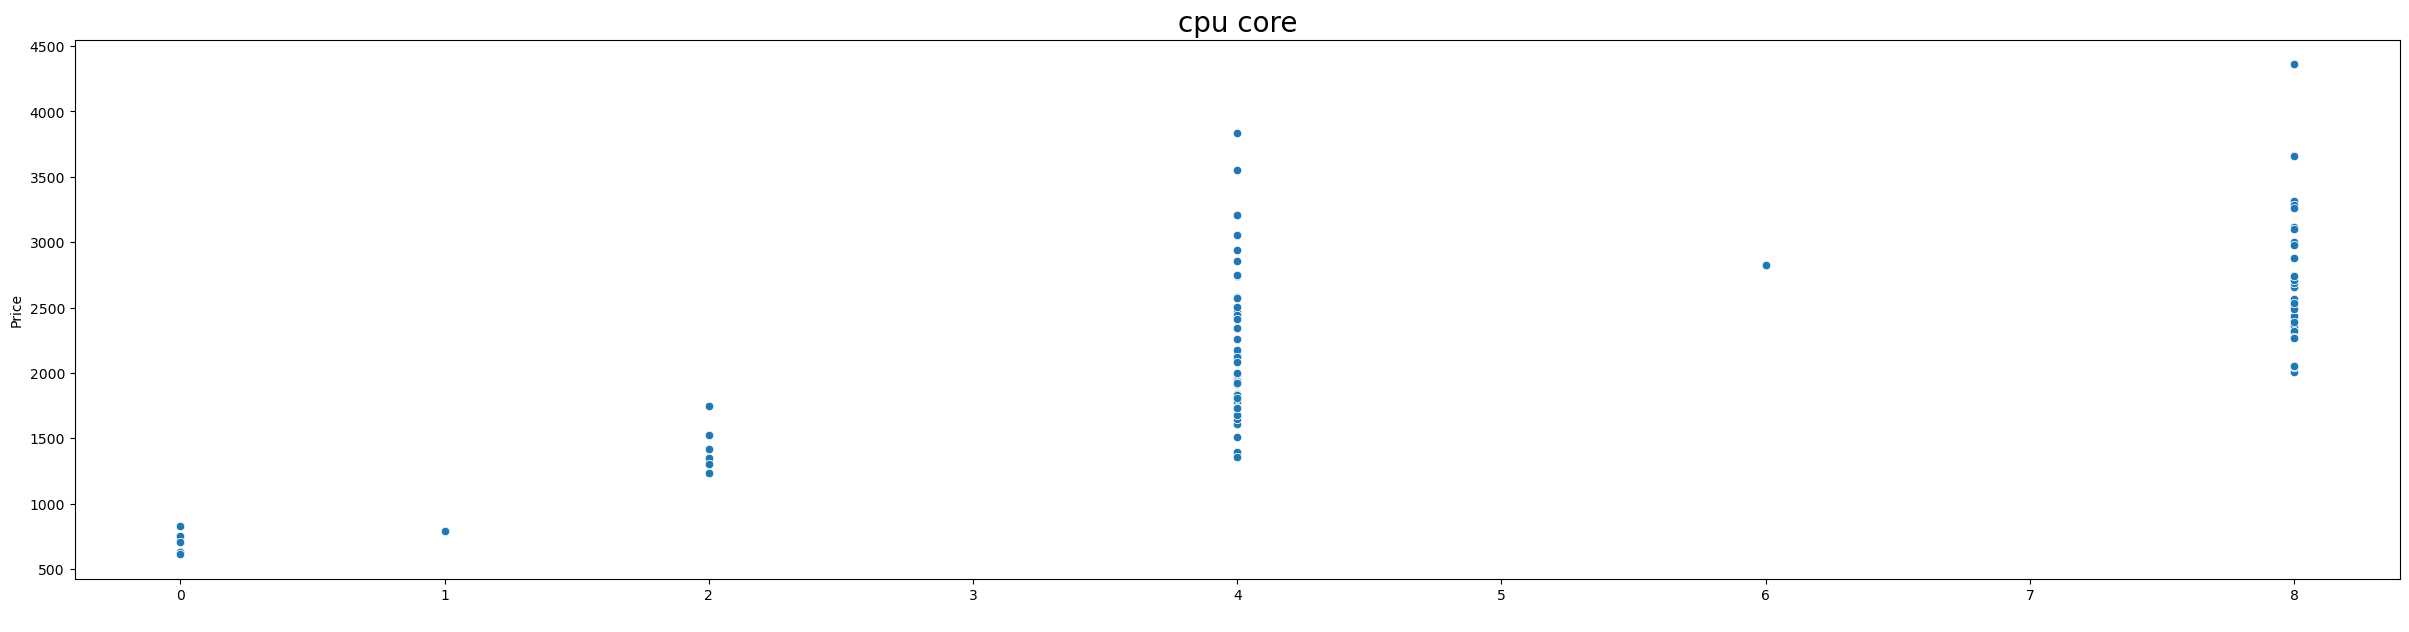

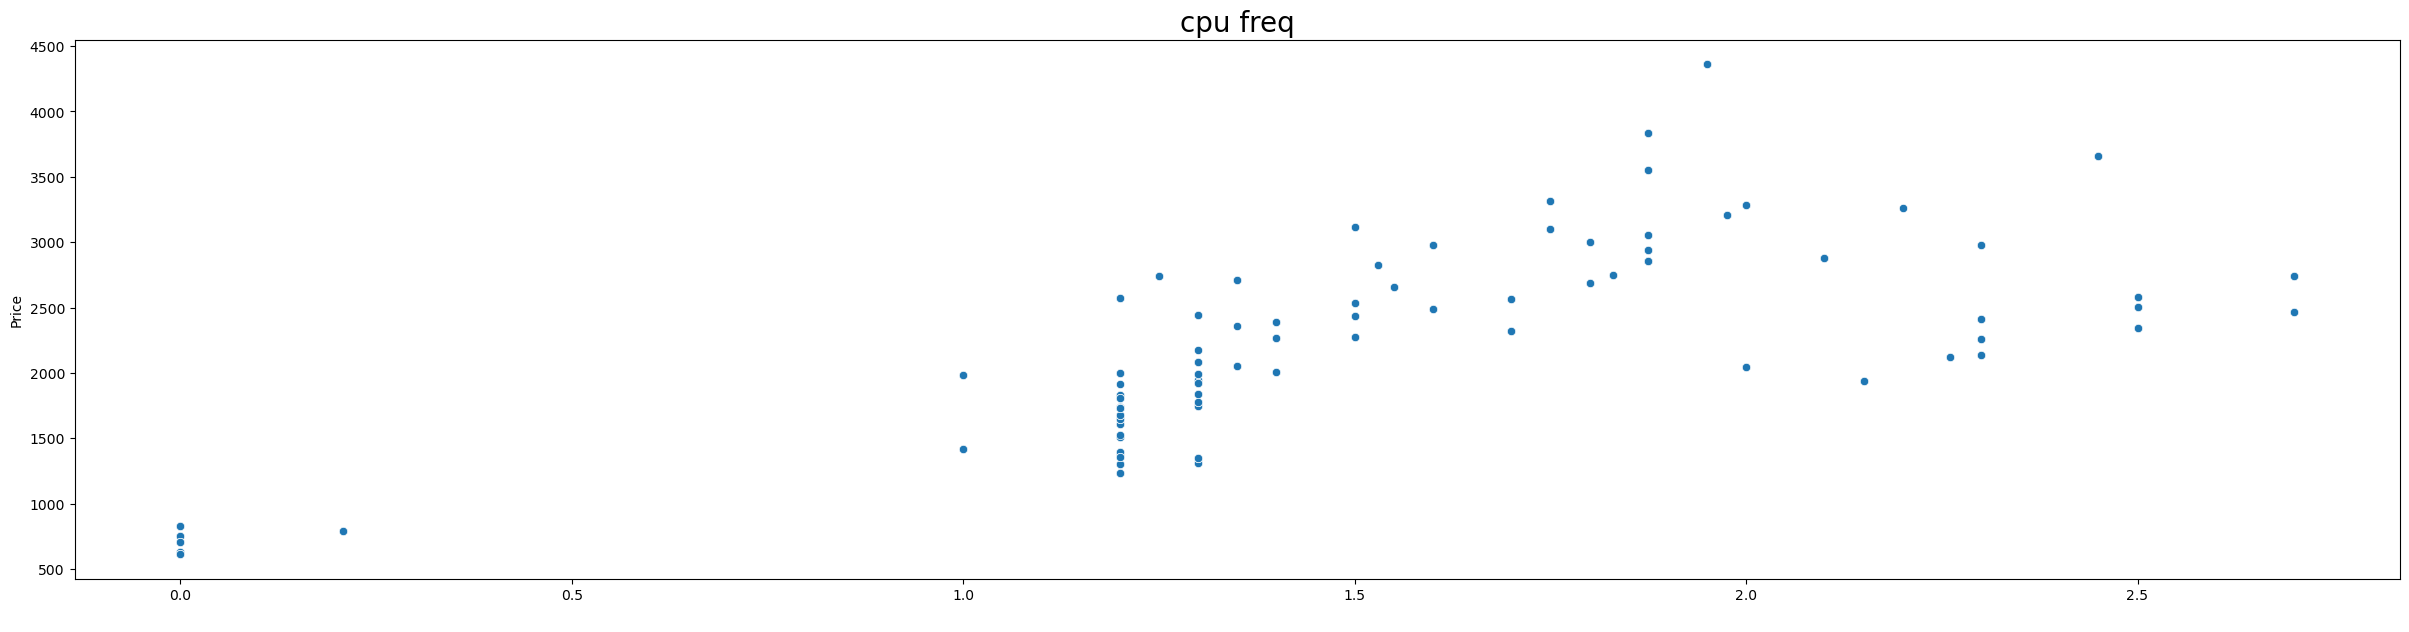

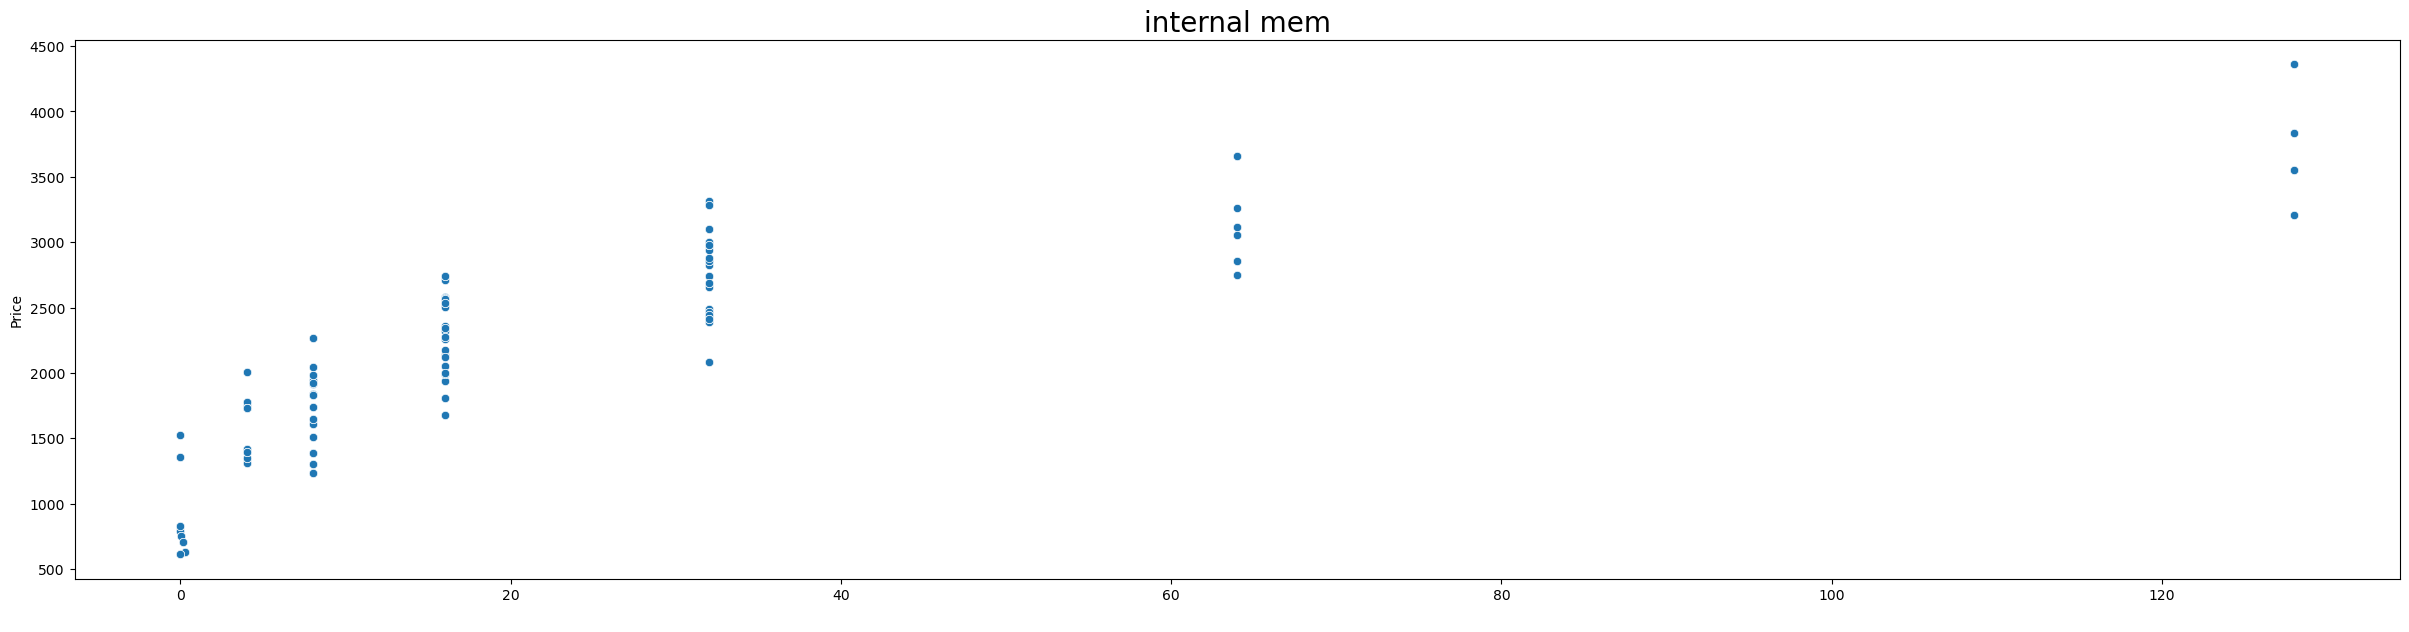

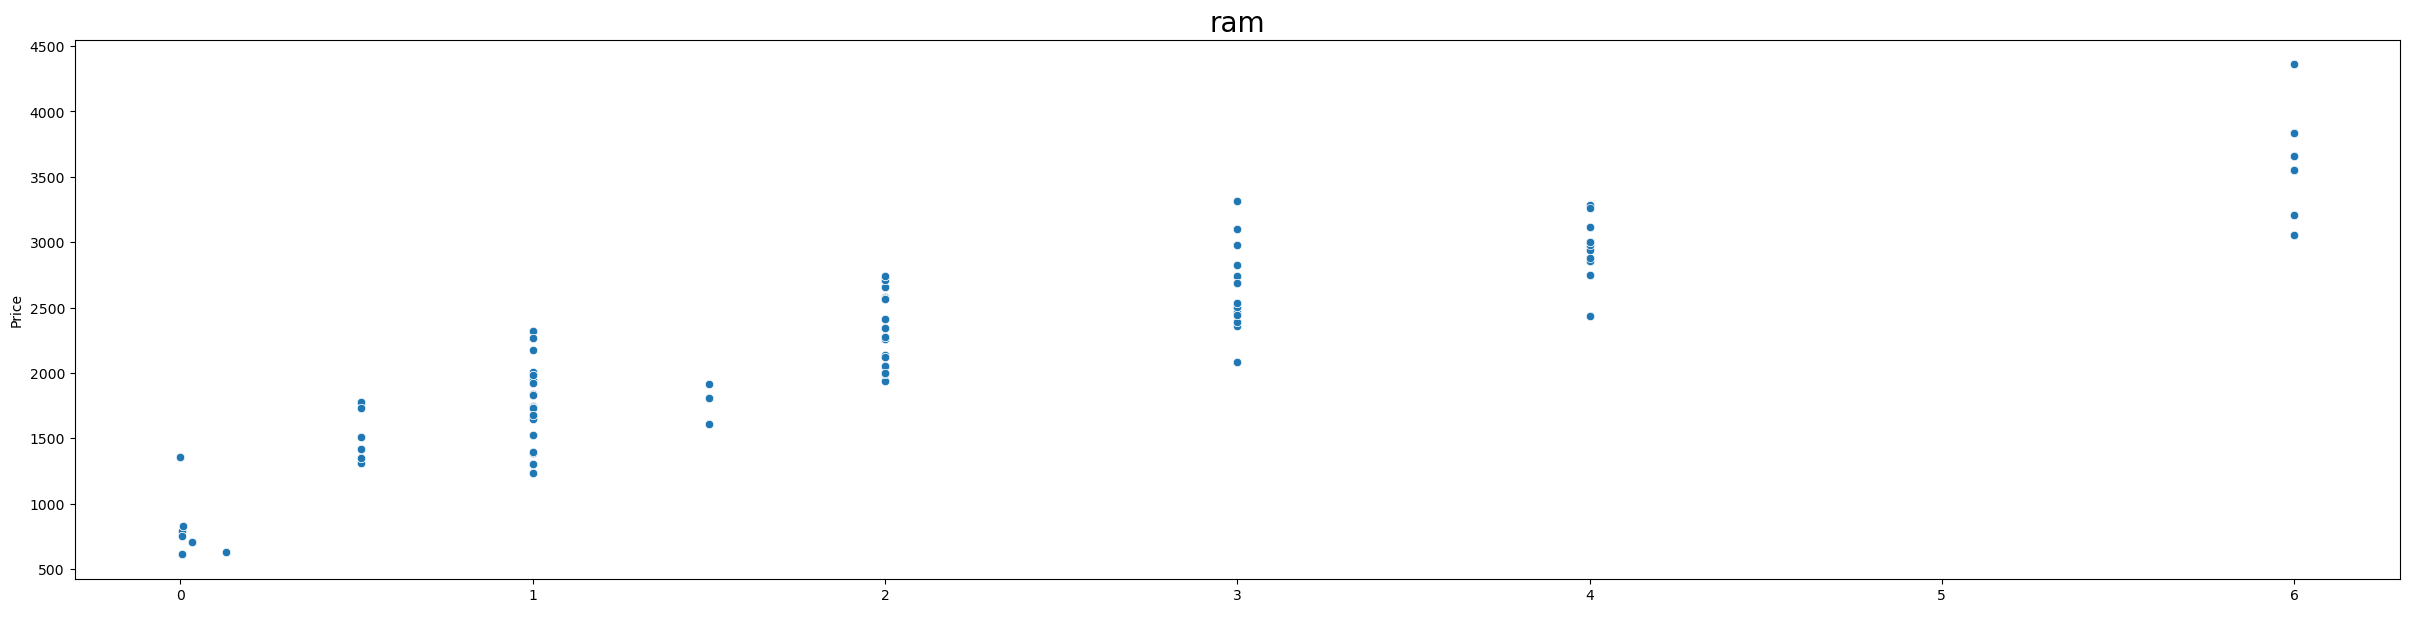

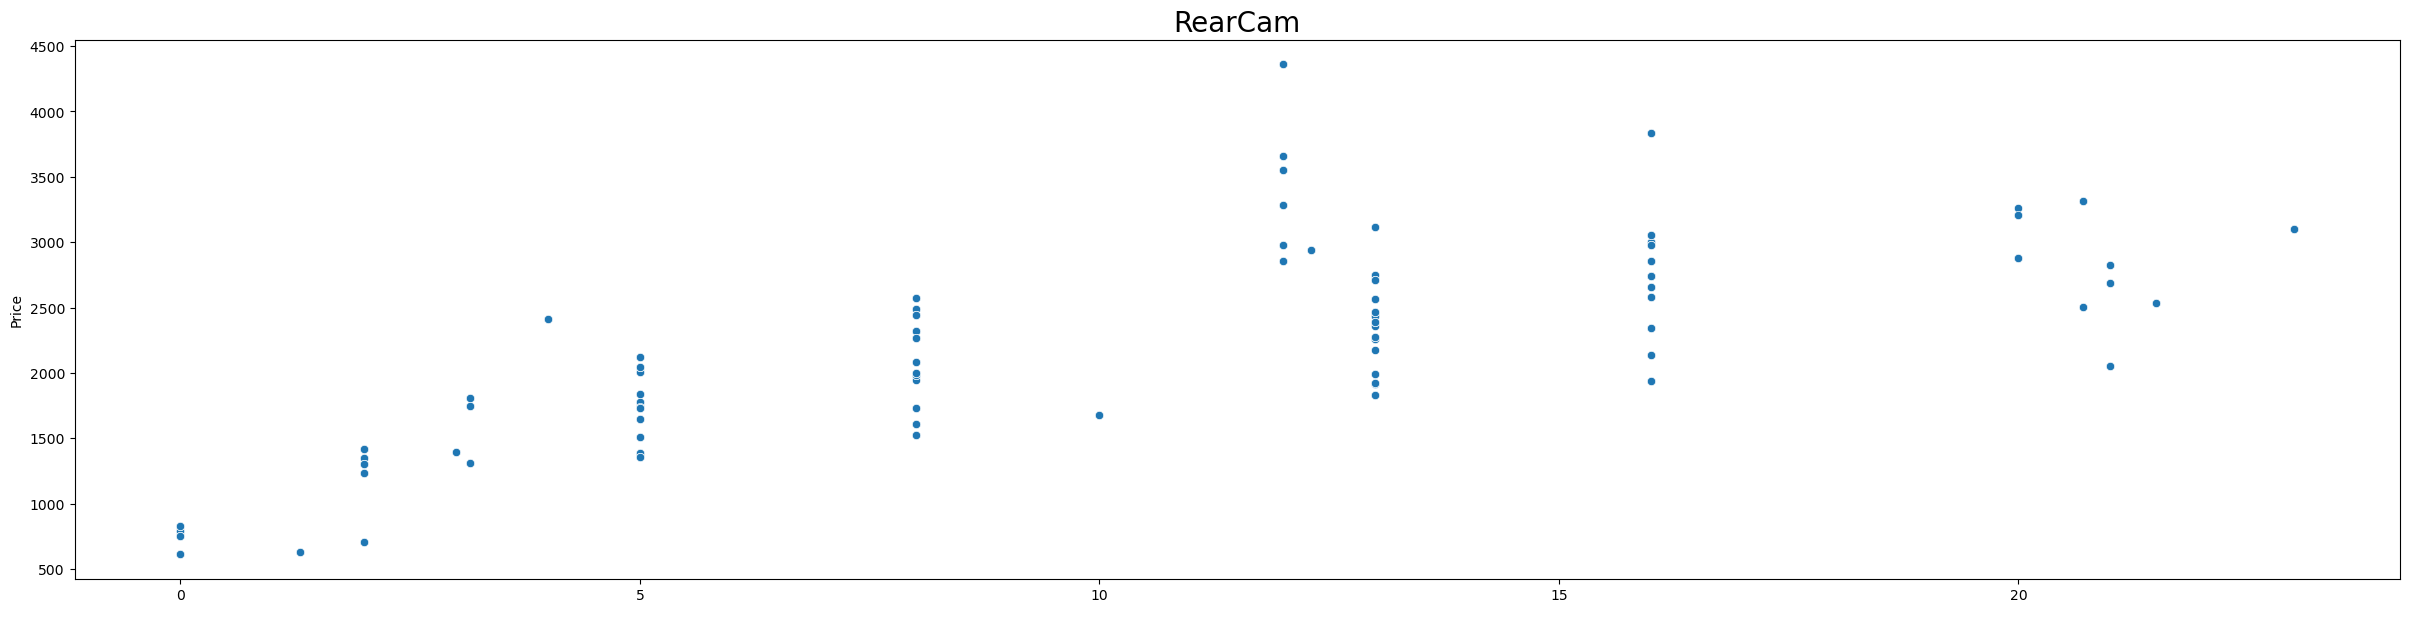

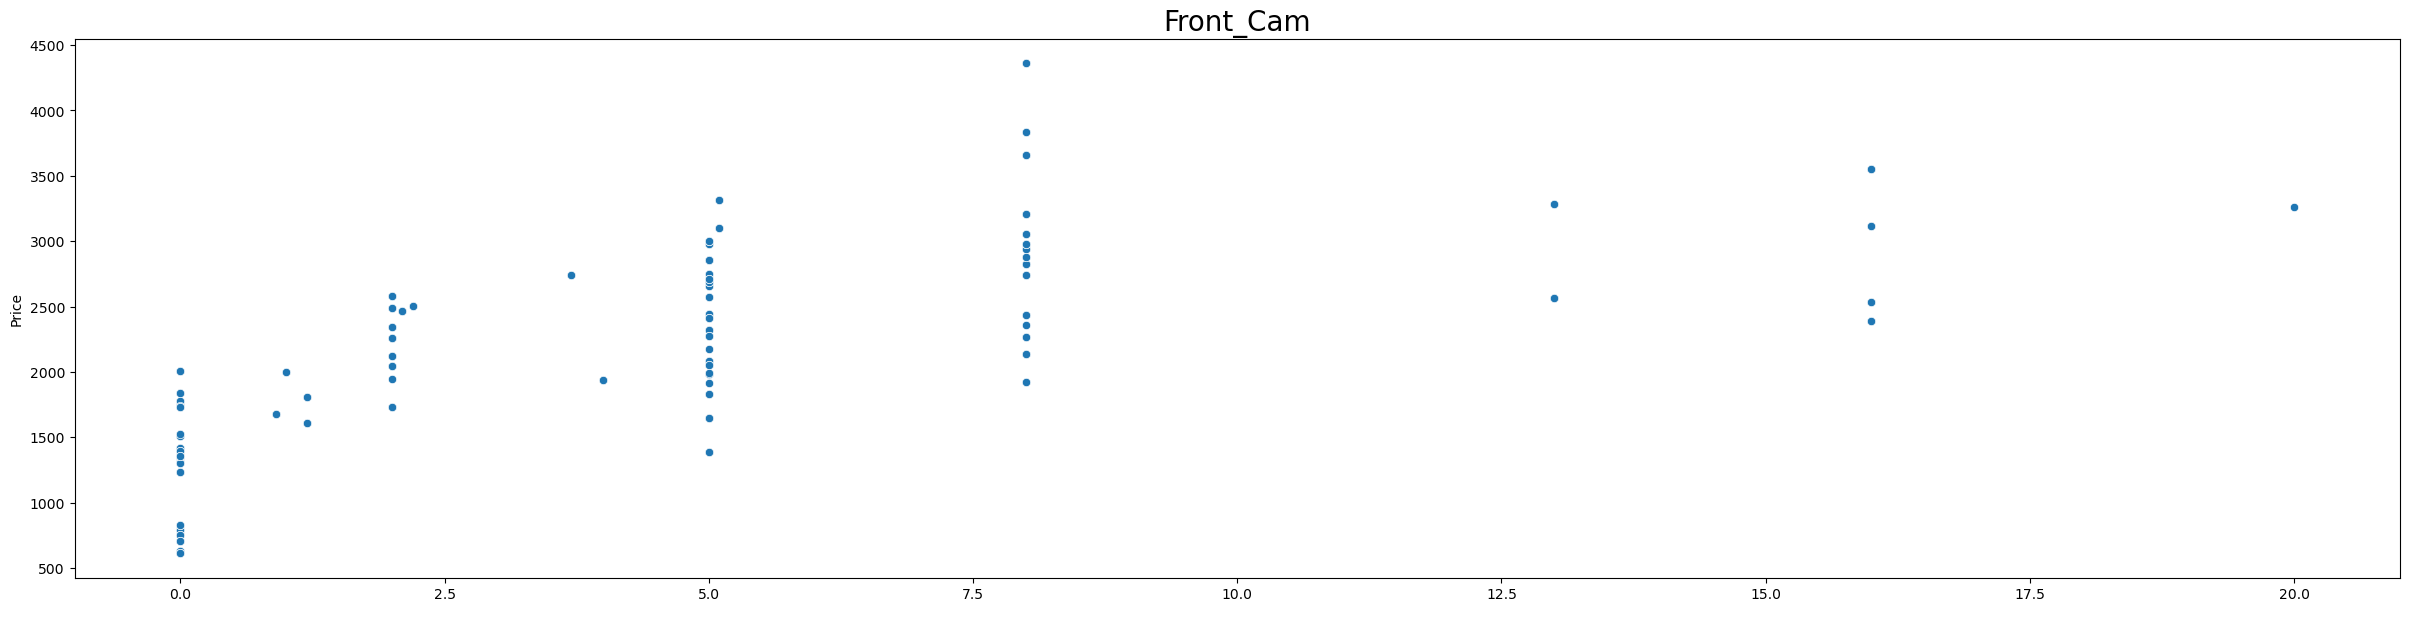

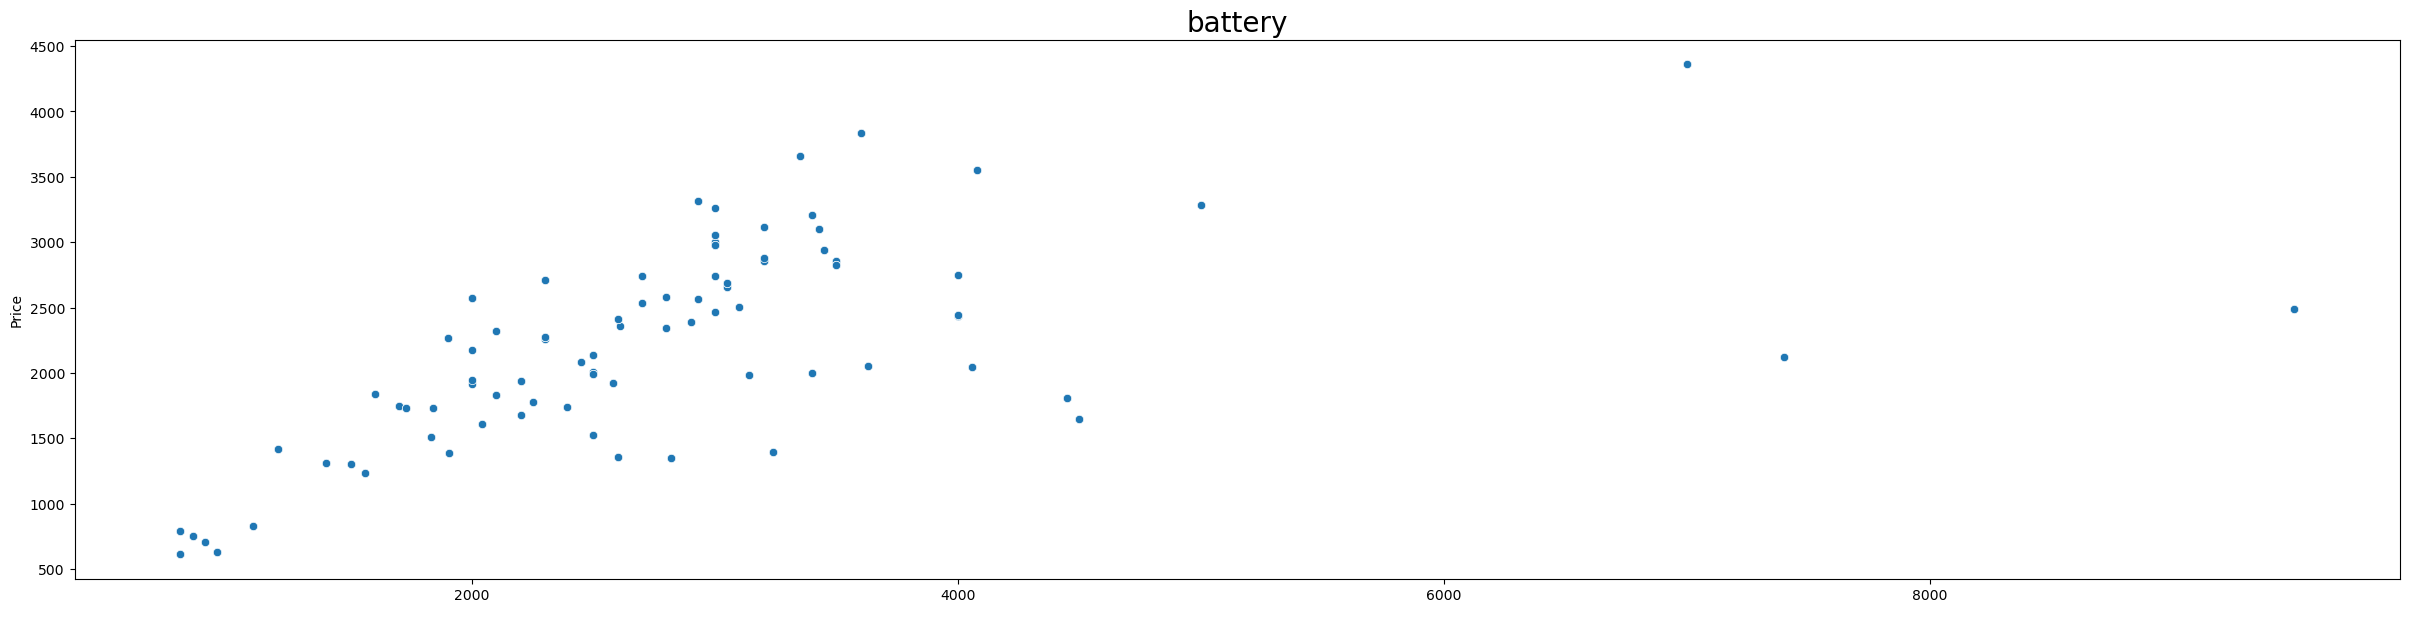

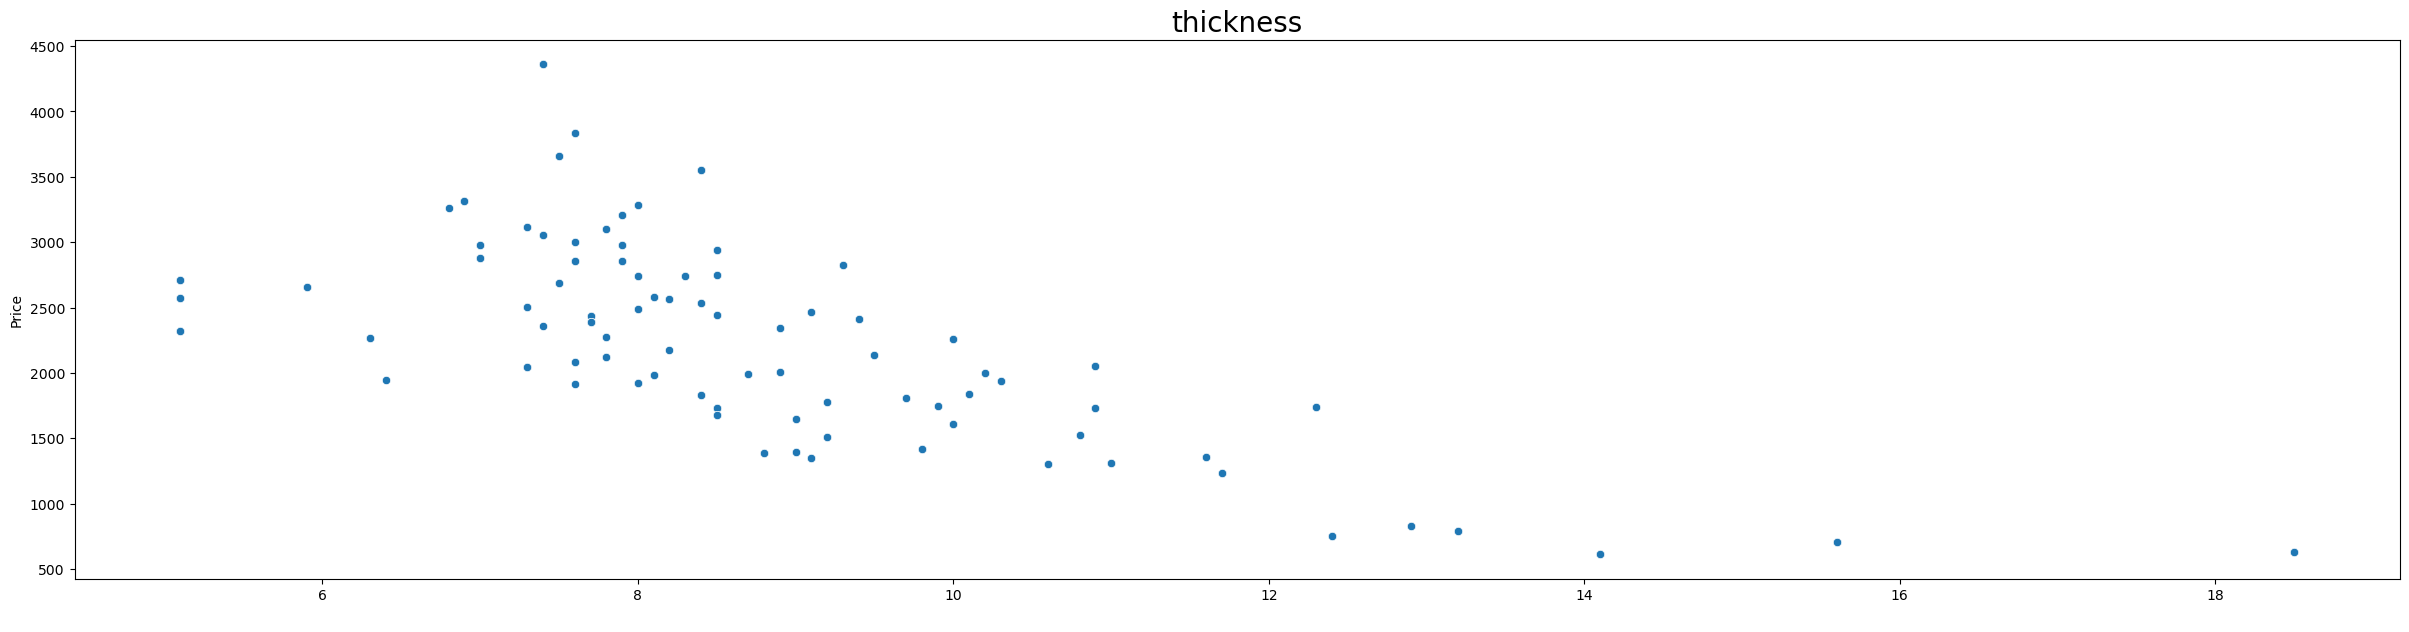

In [8]:
data1_target = data1["Price"]
# Scatter plot between all the independent variables and dependent variable
for col in data1_columns:
    plt.figure(figsize = (30,7))
    sns.scatterplot(data = data1, x = col, y = data1_target)
    plt.xlabel(" ")
    plt.title(col,size = 20)
    plt.show()

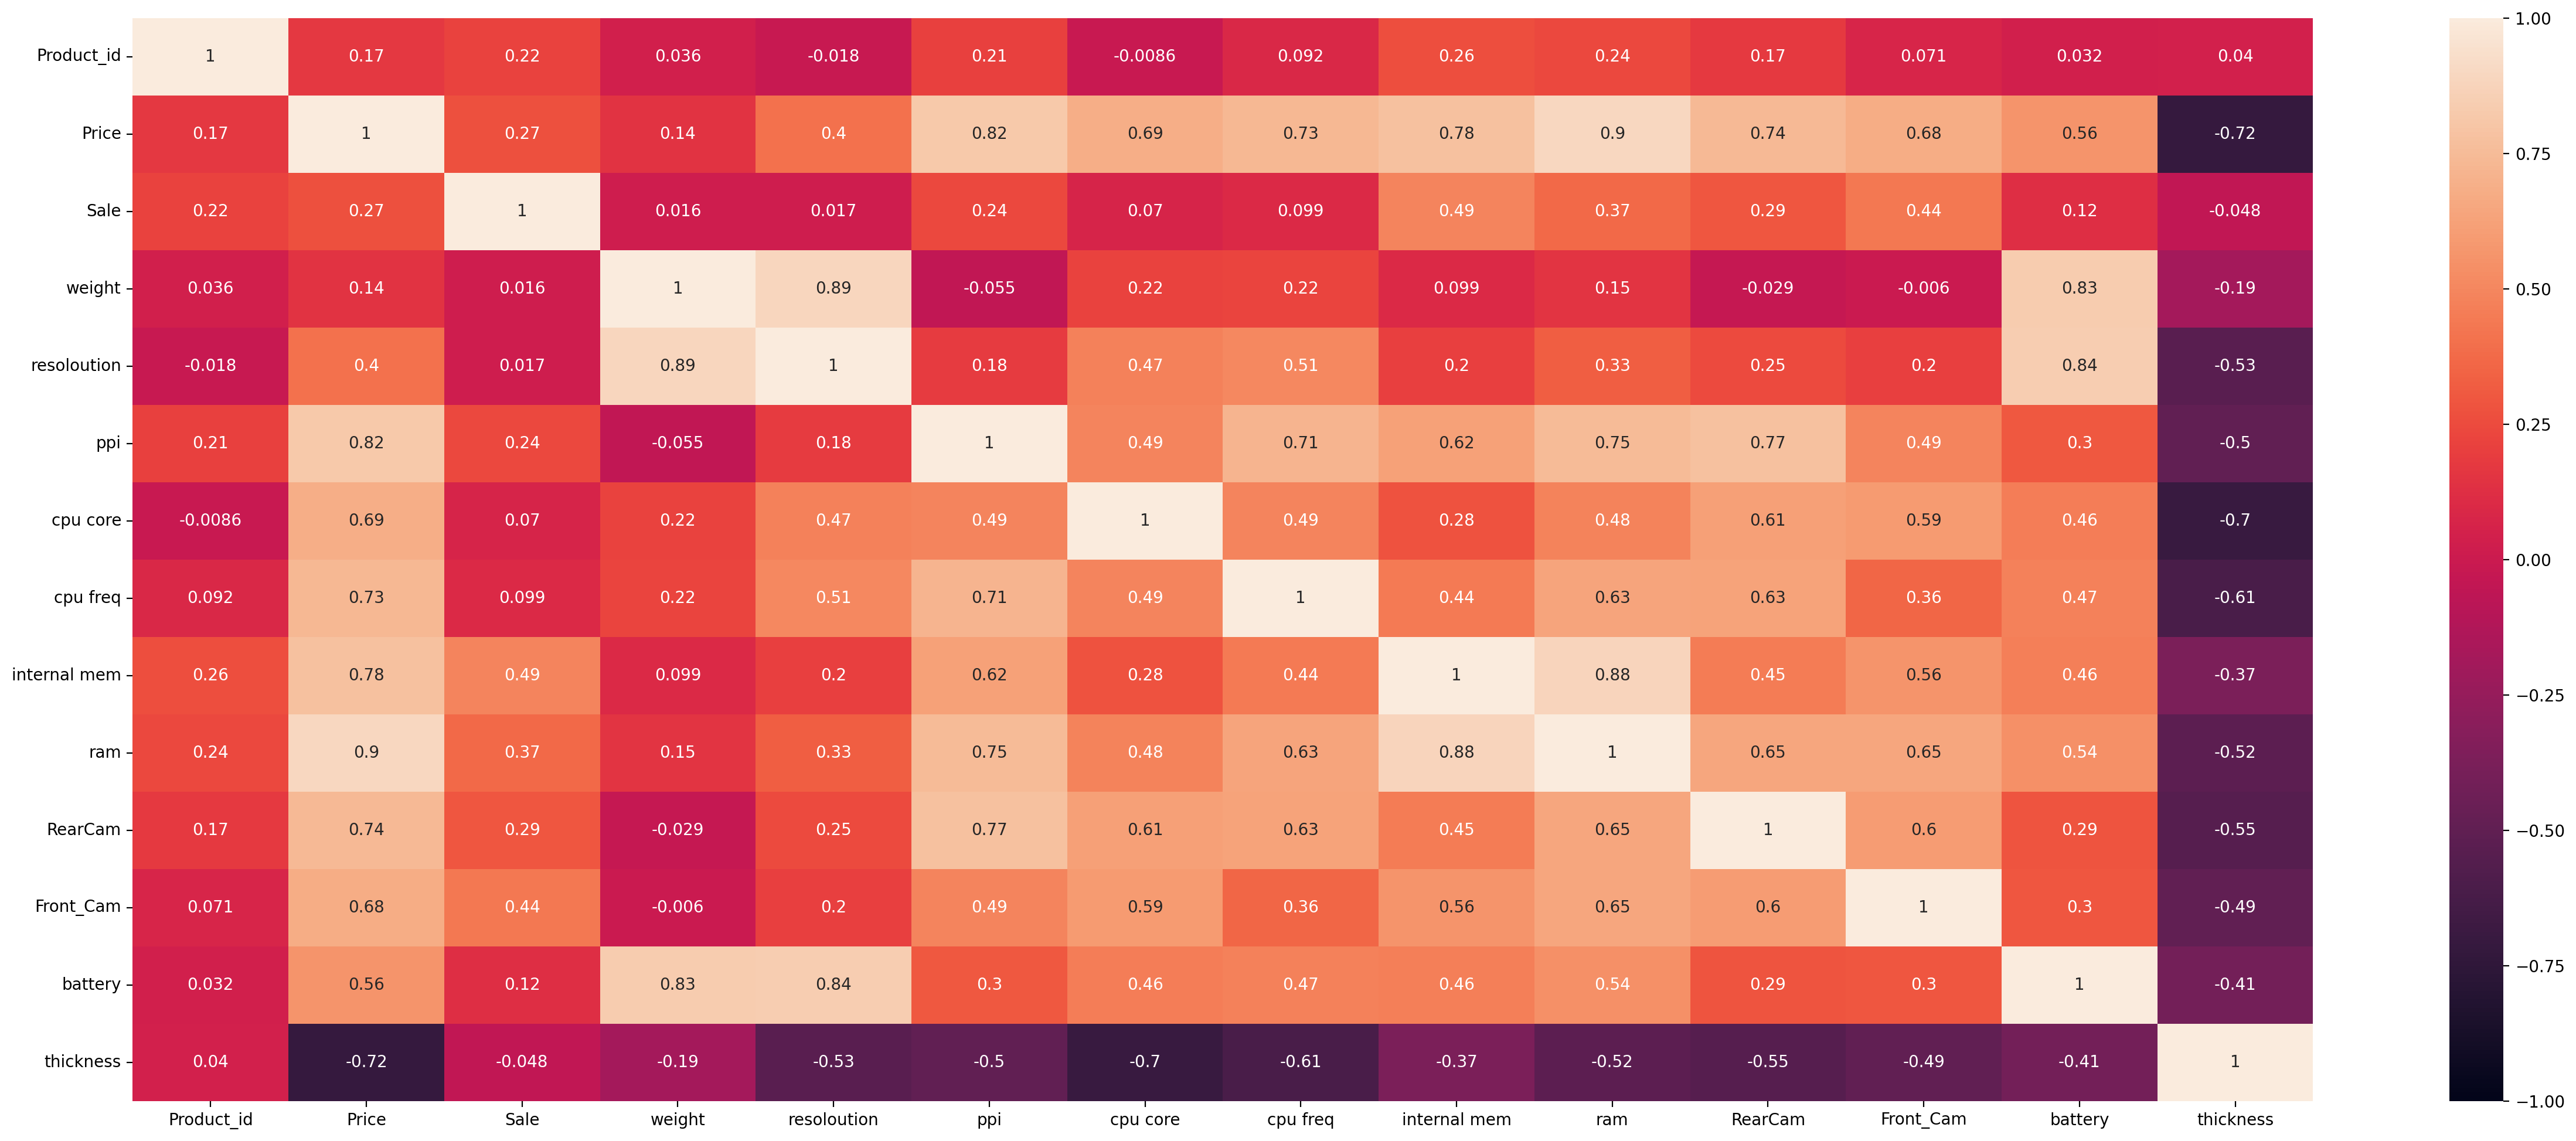

In [9]:
# Correlation between the independent and dependent variables
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(data1.corr(), annot = True, vmin = -1, vmax = +1)
plt.show()

## Splitting target and independent features

In [10]:
# Seperating out the independent and dependent variables
X = data1.drop("Price", axis = 1)
X = X.drop("Product_id", axis = 1)
y = data1["Price"]

In [11]:
X.columns

Index(['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

## Checking the Variance Inflation Factor (VIF) of the features in a regression model to assess multicollinearity

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



# Add a constant term (intercept) to your feature matrix
X_with_const = add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif)


        Features         VIF
0          const  256.235570
1           Sale    1.761026
2         weight   22.708643
3    resoloution   22.231810
4            ppi    4.677627
5       cpu core    3.106053
6       cpu freq    3.895602
7   internal mem    6.805528
8            ram    9.289761
9        RearCam    3.915909
10     Front_Cam    2.778561
11       battery    9.437004
12     thickness    4.086291


## removing features with a VIF (Variance Inflation Factor) greater than 10.

In [13]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def remove_high_vif_features(X, vif_threshold=10):
    removed_features = True
    while removed_features:
        X_with_const = add_constant(X)
        vif = pd.Series([variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])], index=X_with_const.columns)
        max_vif = vif.max()
        
        if max_vif > vif_threshold:
            feature_to_remove = vif.idxmax()
            if feature_to_remove == 'const':
                break  
            X = X.drop(feature_to_remove, axis=1)
            print(f"Removed feature with high VIF: {feature_to_remove}, VIF = {max_vif}")
        else:
            removed_features = False

    return X

# Remove high VIF features
X = remove_high_vif_features(X, vif_threshold=10)


# Model with all features 

In [14]:
from sklearn.metrics import mean_absolute_error


# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# LINEAR MODEL FIT AND PREDICT
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate the adjusted R-squared
n = X_train.shape[0] + X_test.shape[0]
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"r2_score is: {r2}")
print(f"RMSE is: {rmse}")
print(f"MAE is: {mae}")
print(f"Adjusted R2 is: {adjusted_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


r2_score is: 0.9346432098150045
RMSE is: 177.84290435922776
MAE is: 151.1035021134937
Adjusted R2 is: 0.9293440106108156
Mean Absolute Percentage Error (MAPE): 7.14%


In [15]:

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Get the predicted values
y_pred = model.predict(X)

# Calculate the mean of the target variable (y)
y_mean = np.mean(y)

# Calculate SST (Total Sum of Squares)
sst = np.sum((y - y_mean)**2)

# Calculate SSR (Sum of Squares of Regression)
ssr = np.sum((y_pred - y_mean)**2)

# Calculate SSE (Sum of Squares of Errors)
sse = np.sum((y - y_pred)**2)

# Print SST, SSR, and SSE
print("SST (Total Sum of Squares):", sst)
print("SSR (Sum of Squares of Regression):", ssr)
print("SSE (Sum of Squares of Errors):", sse)


SST (Total Sum of Squares): 94417844.75776398
SSR (Sum of Squares of Regression): 90082155.253447
SSE (Sum of Squares of Errors): 4335689.504316371


In [16]:
print(ssr/sst)

0.9540797662196111


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to your data
model.fit(X_train, y_train)

# Get the coefficients (weights) and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 1694.2737777082857
Coefficients: [-1.80396882e-02 -7.26403120e-01 -5.00934900e+01  1.13092546e+00
  5.13933609e+01  9.93990275e+01  6.49840234e+00  8.69558823e+01
  3.30421669e+00  8.69661595e+00  1.32682148e-01 -7.53796756e+01]


In [18]:
if(round(sst,2) == round(ssr+sse,2)):
    print("yes")
print(ssr+sse)

yes
94417844.75776337


In [19]:
print("Regression Equation :")
print(sst,"=",ssr,'+',sse)


Regression Equation :
94417844.75776398 = 90082155.253447 + 4335689.504316371


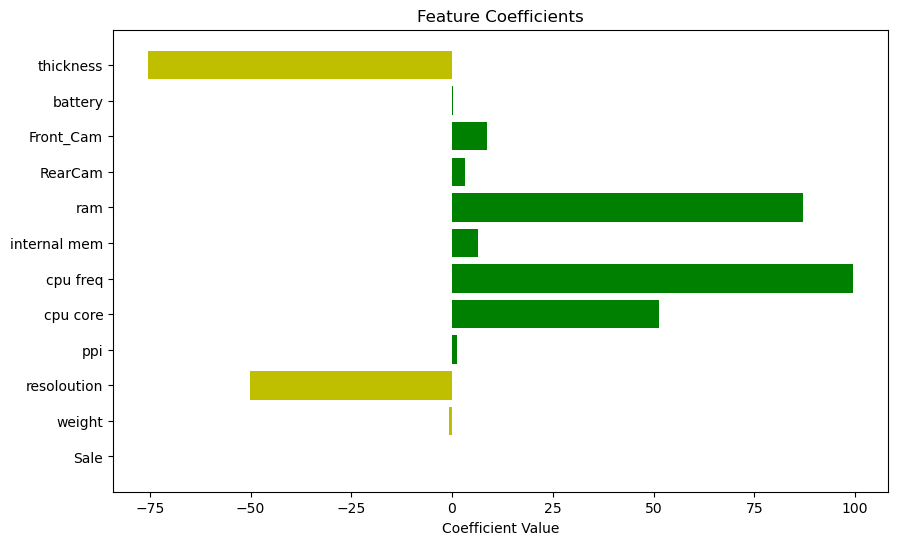

In [20]:
import matplotlib.pyplot as plt
import numpy as np

feature_names=X.columns

# Define colors for positive and negative coefficients
colors = ['g' if c >= 0 else 'y' for c in coefficients]

# Create a barplot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')

plt.show()


# Residual plot & its kdeplot.

## These residual plots are very usefull in determing if Linear Regression was right choice.


**Note** - If we have a perfect model. Then our resudials would be zero.<br>


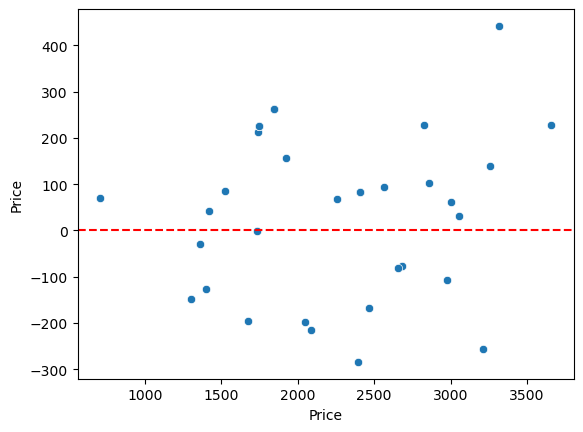

In [21]:

y_pred = lr.predict(X_test)

residuals = y_test - y_pred

sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

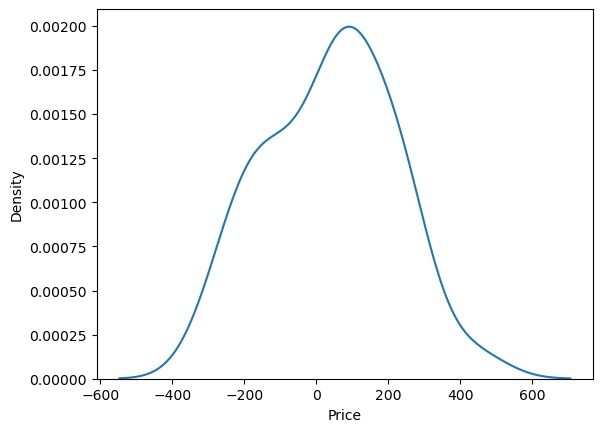

In [22]:
# Looks normally distributed to me.....
sns.kdeplot(residuals)
plt.show()

In [23]:
# Skewed by a bit is fine...
residuals.skew()

0.0006502777542892584

### According to the data CPU Freq. has the best Coefficient Value, Followed by RAM

# Heteroskedasticity  Test

##### Heteroskedasticity (or heteroscedasticity) refers to the situation in which the variability of the error terms (residuals) in a regression model is not constant across all levels of the independent variable(s). In simpler terms, the spread or dispersion of the residuals changes as the values of the independent variable(s) change.

##### Heteroskedasticity violates one of the assumptions of classical linear regression, which assumes homoskedasticity (constant variance of residuals). When heteroskedasticity is present, it can lead to inefficient estimates of the regression coefficients, and standard errors may be biased.

In [32]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np

X = sm.add_constant(X)  # Add a constant term to the feature matrix
model = sm.OLS(y, X)
results = model.fit()

# Calculate residuals
residuals = results.resid

# Perform the Breusch-Pagan test
bp_test_statistic, bp_p_value, _, _ = het_breuschpagan(residuals, X)
print(f"Breusch-Pagan Test Statistic: {bp_test_statistic}")
print(f"P-value: {bp_p_value}")

# Interpret the result
alpha = 0.05
if bp_p_value < alpha:
    print("Reject the null hypothesis. Heteroskedasticity may be present.")
else:
    print("Fail to reject the null hypothesis. No strong evidence of heteroskedasticity.")


Breusch-Pagan Test Statistic: 26.79186118312562
P-value: 0.008278154929953041
Reject the null hypothesis. Heteroskedasticity may be present.


# Test for Auto-Correlation

####  The Durbin-Watson statistic ranges from 0 to 4, and values around 2 indicate no autocorrelation. Values significantly below 2 may suggest positive autocorrelation, while values significantly above 2 may suggest negative autocorrelation. The thresholds for significance may vary depending on the context and the specific characteristics of the data.

In [25]:
import statsmodels.api as sm
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {durbin_watson_statistic}")

# Interpret the result
if durbin_watson_statistic < 1.5:
    print("Positive autocorrelation may be present.")
elif durbin_watson_statistic > 2.5:
    print("Negative autocorrelation may be present.")
else:
    print("Autocorrelation is likely not present.")


Durbin-Watson Statistic: 2.258843891375515
Autocorrelation is likely not present.
